In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [539]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

%config InlineBackend.figure_format = 'retina' 

In [2]:
df = pd.read_csv('NBA_Stats_71_Years_Updated.csv')

# Player Development

In [547]:
recent_10_years = df[df['Season Start Year']>2012]

In [4]:
rookie_recent_10_years = recent_10_years[['Year','Season Start Year','Player ID','Player','Team','Games Played','Minutes Played','Rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal Fouls', 'Points Scored','Season Type']]
rookie_recent_10_years = rookie_recent_10_years[rookie_recent_10_years['Season Type'] == 'Regular Season']
rookie_recent_10_years = rookie_recent_10_years.reset_index().drop(columns = ['index','Season Type'])
rookie_recent_10_years

,Year,Season Start Year,Player ID,Player,Team,Games Played,Minutes Played,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored
0,2013-14,2013,201142,Kevin Durant,OKC,81,3122,598,445,103.0,59.0,285.0,174,2593
1,2013-14,2013,2546,Carmelo Anthony,NYK,77,2982,622,242,95.0,51.0,198.0,224,2112
2,2013-14,2013,2544,LeBron James,MIA,77,2902,533,488,121.0,26.0,270.0,126,2089
3,2013-14,2013,201567,Kevin Love,MIN,77,2797,963,341,59.0,35.0,196.0,136,2010
4,2013-14,2013,201933,Blake Griffin,LAC,80,2863,757,309,92.0,51.0,224.0,265,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,2022-23,2022,1631214,Alondes Williams,BKN,1,5,1,0,0.0,0.0,2.0,1,0
5215,2022-23,2022,1629126,Deonte Burton,SAC,2,7,0,0,0.0,0.0,0.0,0,0
5216,2022-23,2022,1628402,Frank Jackson,UTA,1,5,2,1,0.0,0.0,0.0,0,0
5217,2022-23,2022,1630701,Michael Foster Jr.,PHI,1,1,0,0,0.0,0.0,0.0,0,0


In [14]:
grow = np.zeros(rookie_recent_10_years.shape[0])
isrookie = np.zeros(rookie_recent_10_years.shape[0])

In [117]:
olds = rookie_recent_10_years[rookie_recent_10_years['Season Start Year']<2017]['Player'].unique()

In [79]:

olds = rookie_recent_10_years[rookie_recent_10_years['Season Start Year']<2017]['Player'].unique()
for a in range(len(rookie_recent_10_years)):
    if rookie_recent_10_years.iloc[a]['Season Start Year'] >=2013:
        last_year = rookie_recent_10_years.iloc[a]['Season Start Year']-1
        name = rookie_recent_10_years.iloc[a]['Player']
        last_score = rookie_recent_10_years[(rookie_recent_10_years['Season Start Year']
                                             == last_year) & (rookie_recent_10_years['Player']
                                                              == name)]['Points Scored']
        
        if len(last_score) == 0:
            if name not in olds:
                isrookie[a] =1
            continue
        elif last_score.iloc[0] == 0:
            continue
        grow[a] = (rookie_recent_10_years.iloc[a]['Points Scored']-last_score)/last_score
        
rookie_recent_10_years['growth'] = grow
rookie_recent_10_years['isrookie'] = isrookie
pure_rookie = rookie_recent_10_years[rookie_recent_10_years['isrookie'] == 1]

In [116]:
rookies_2017 = list(pure_rookie[pure_rookie['Season Start Year'] == 2017]['Player'])

In [81]:
check =[]
for i in range(rookie_recent_10_years.shape[0]):
    if rookie_recent_10_years.iloc[i]['Player'] in rookies_2017:
        check.append(True)
    else:
        check.append(False)

In [548]:
rookie_2017_dt = pure_rookie[pure_rookie['Season Start Year'] >= 2017]

In [100]:
rookie_growing = rookie_2017_dt.groupby('Player').min()[rookie_2017_dt.groupby('Player').min()['Games Played'] > 15]
rookie_growing_from_2017 = rookie_growing[rookie_growing['Season Start Year'] == 2017]

In [102]:
rookie_recent_5_years = rookie_recent_10_years[rookie_recent_10_years['Season Start Year']>=2017]

In [109]:
keep_on_court = rookie_recent_5_years.groupby('Player').count()[rookie_recent_5_years.groupby('Player')['Year'].count()>=5].index

In [111]:
final_list = set(rookie_growing_from_2017.index) & set(keep_on_court)

In [122]:
promising_players = rookie_recent_5_years.groupby('Player').mean().loc[final_list].sort_values('Points Scored',ascending = False)

In [142]:
Top3 = promising_players.head(3)
Top3

,Season Start Year,Player ID,Games Played,Minutes Played,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,growth,isrookie
Player,,,,,,,,,,,,,
Donovan Mitchell,2019.5,1628378.0,68.833333,2344.833333,287.000000,307.166667,90.666667,21.0,190.666667,173.666667,1692.666667,0.038205,0.166667
Jayson Tatum,2019.5,1628369.0,73.166667,2486.000000,511.500000,241.333333,81.333333,50.5,165.333333,155.000000,1644.166667,0.125469,0.166667
De'Aaron Fox,2019.5,1628368.0,65.833333,2126.666667,240.666667,408.666667,85.833333,27.5,180.166667,171.000000,1329.000000,0.175899,0.166667


In [437]:
labels = rookie_recent_5_years.columns[7:13]

In [561]:
labels_A = rookie_recent_5_years.columns[7:11]
angles=np.linspace(0, 2*np.pi, len(labels_A), endpoint=False)
stats_prom = promising_players[labels_A].mean()
stats_prom = np.concatenate((stats_prom,[stats_prom[0]]))
angles = np.concatenate((angles,[angles[0]]))

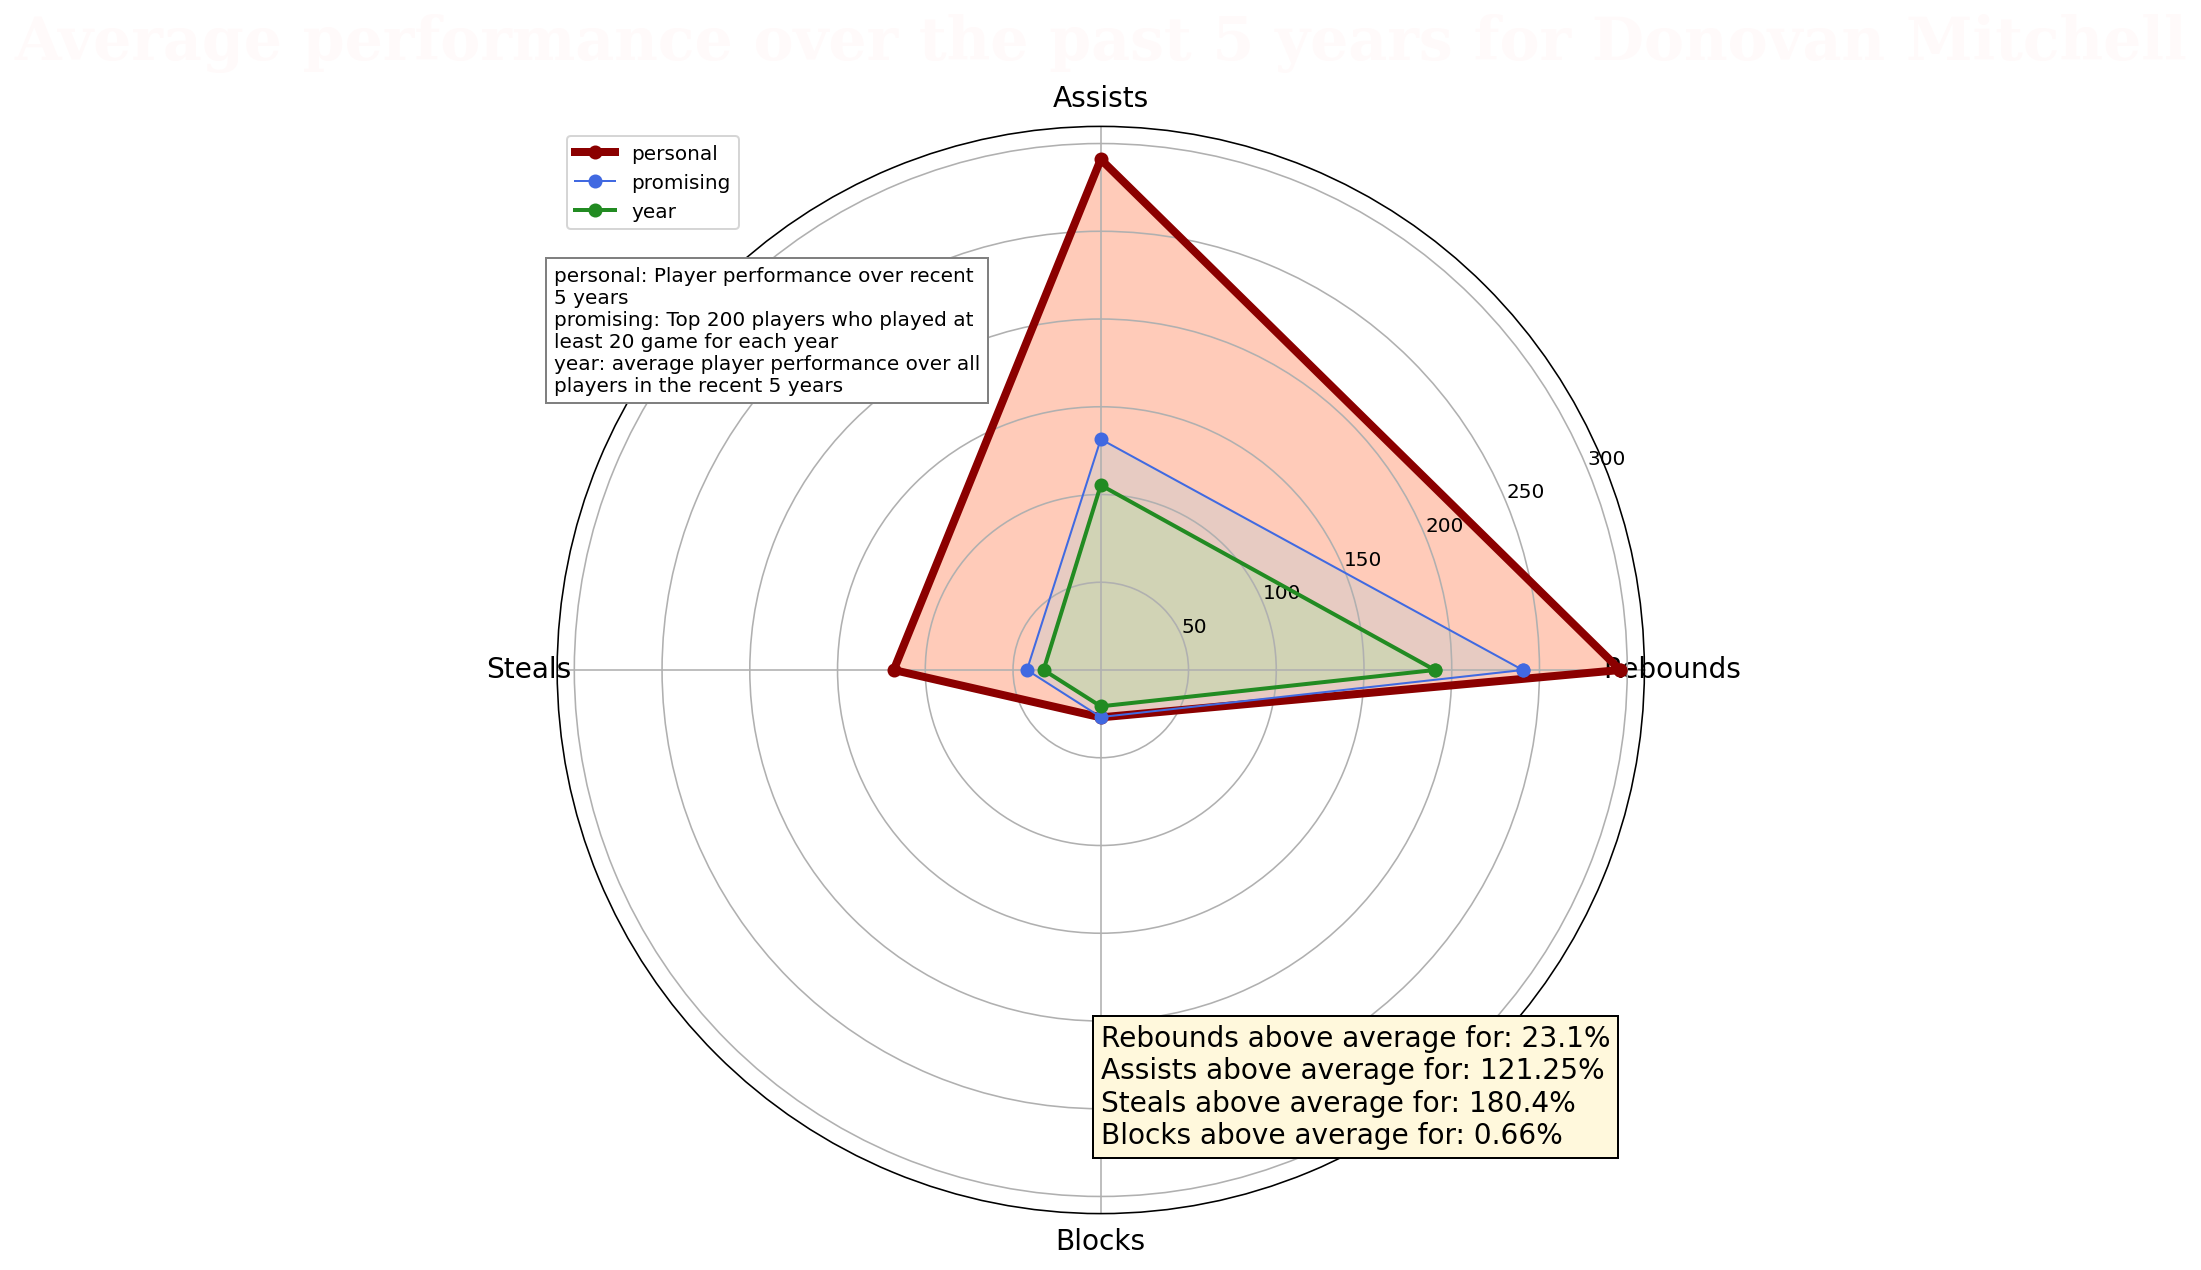

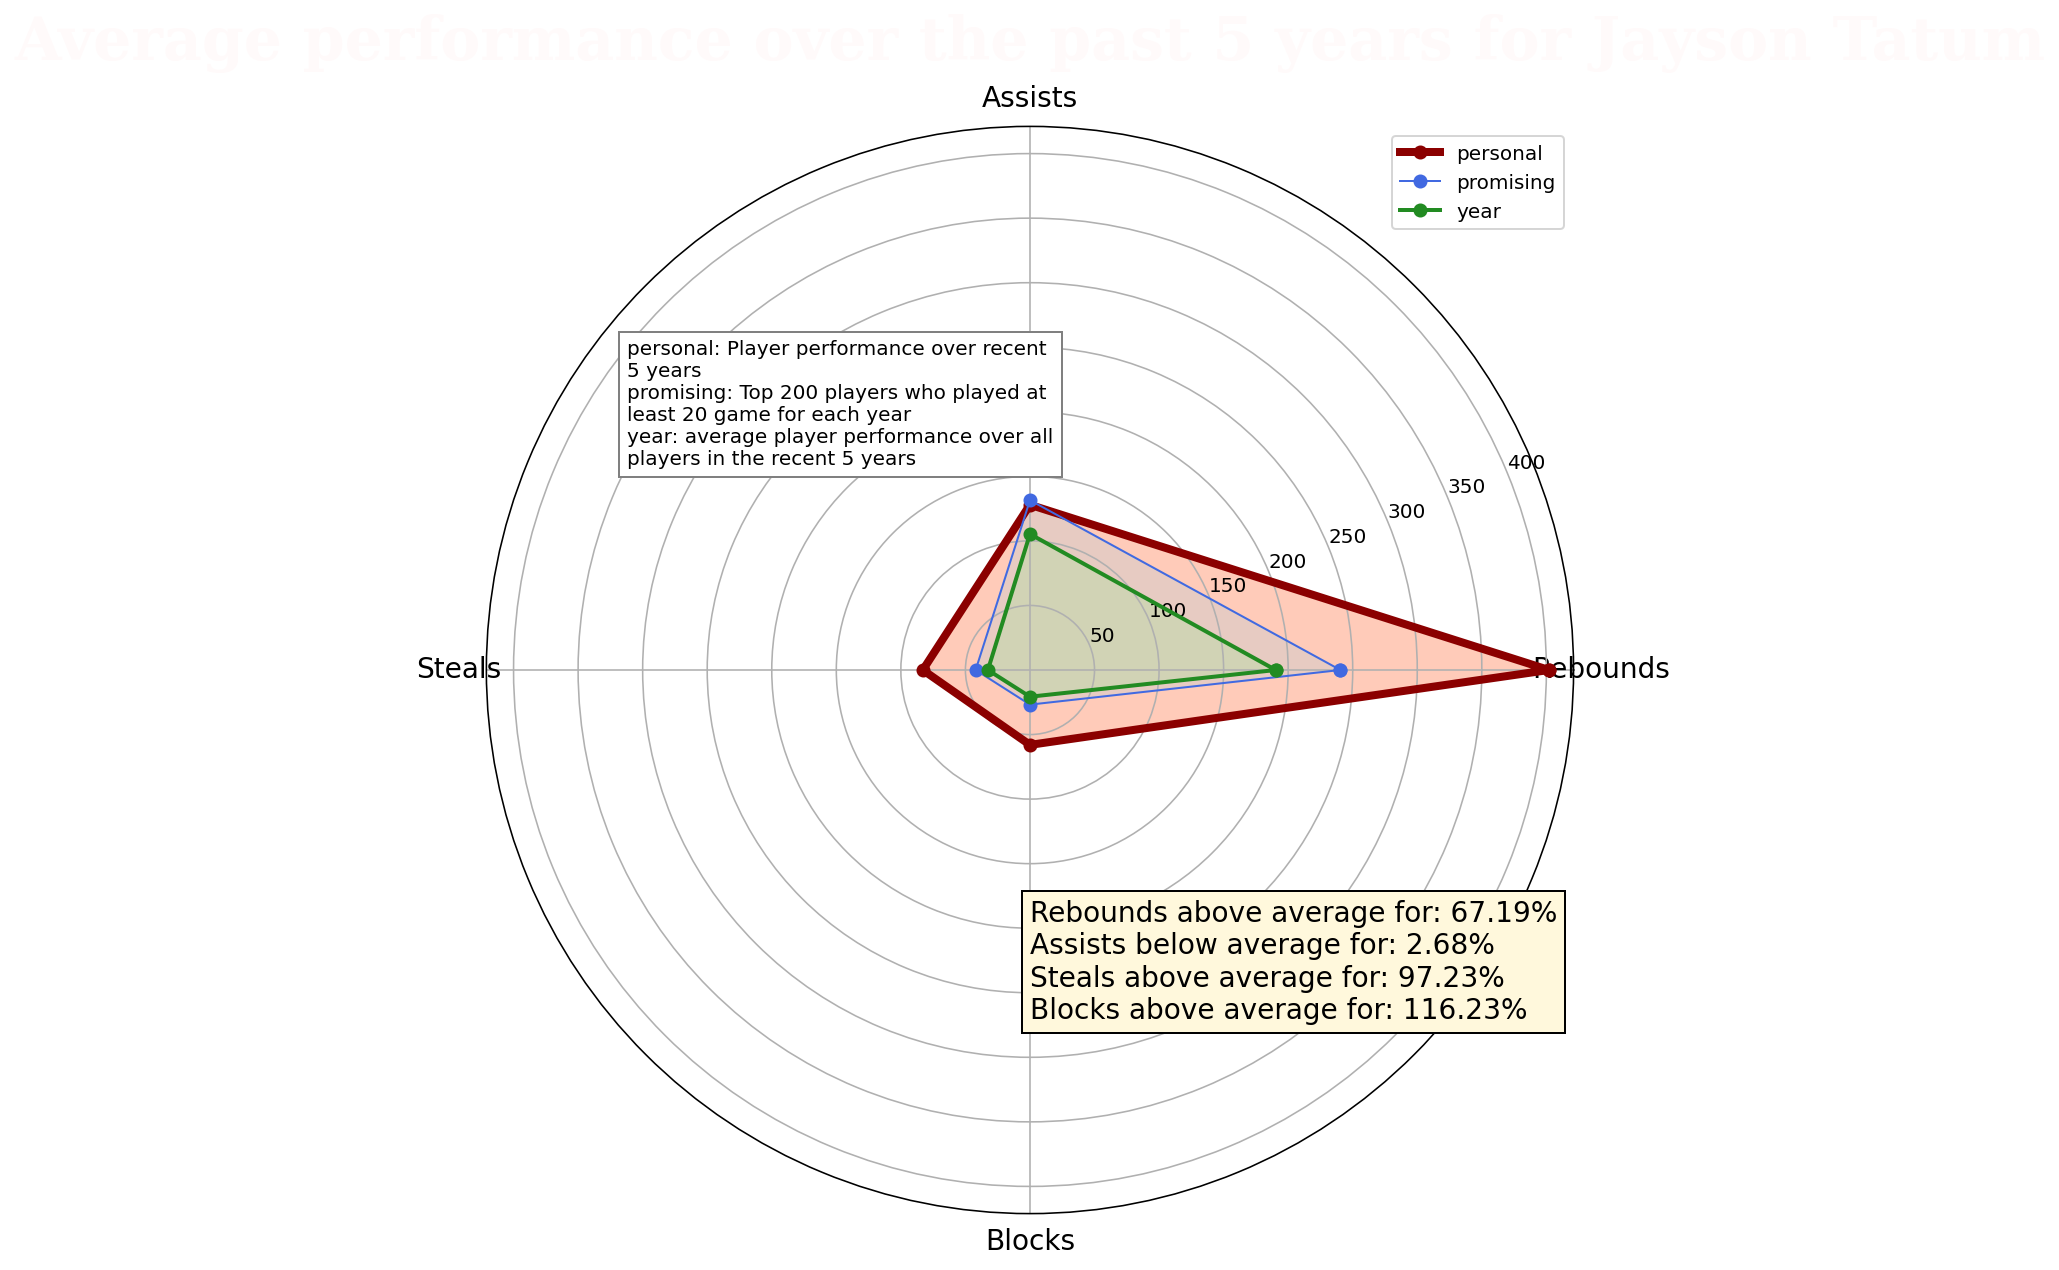

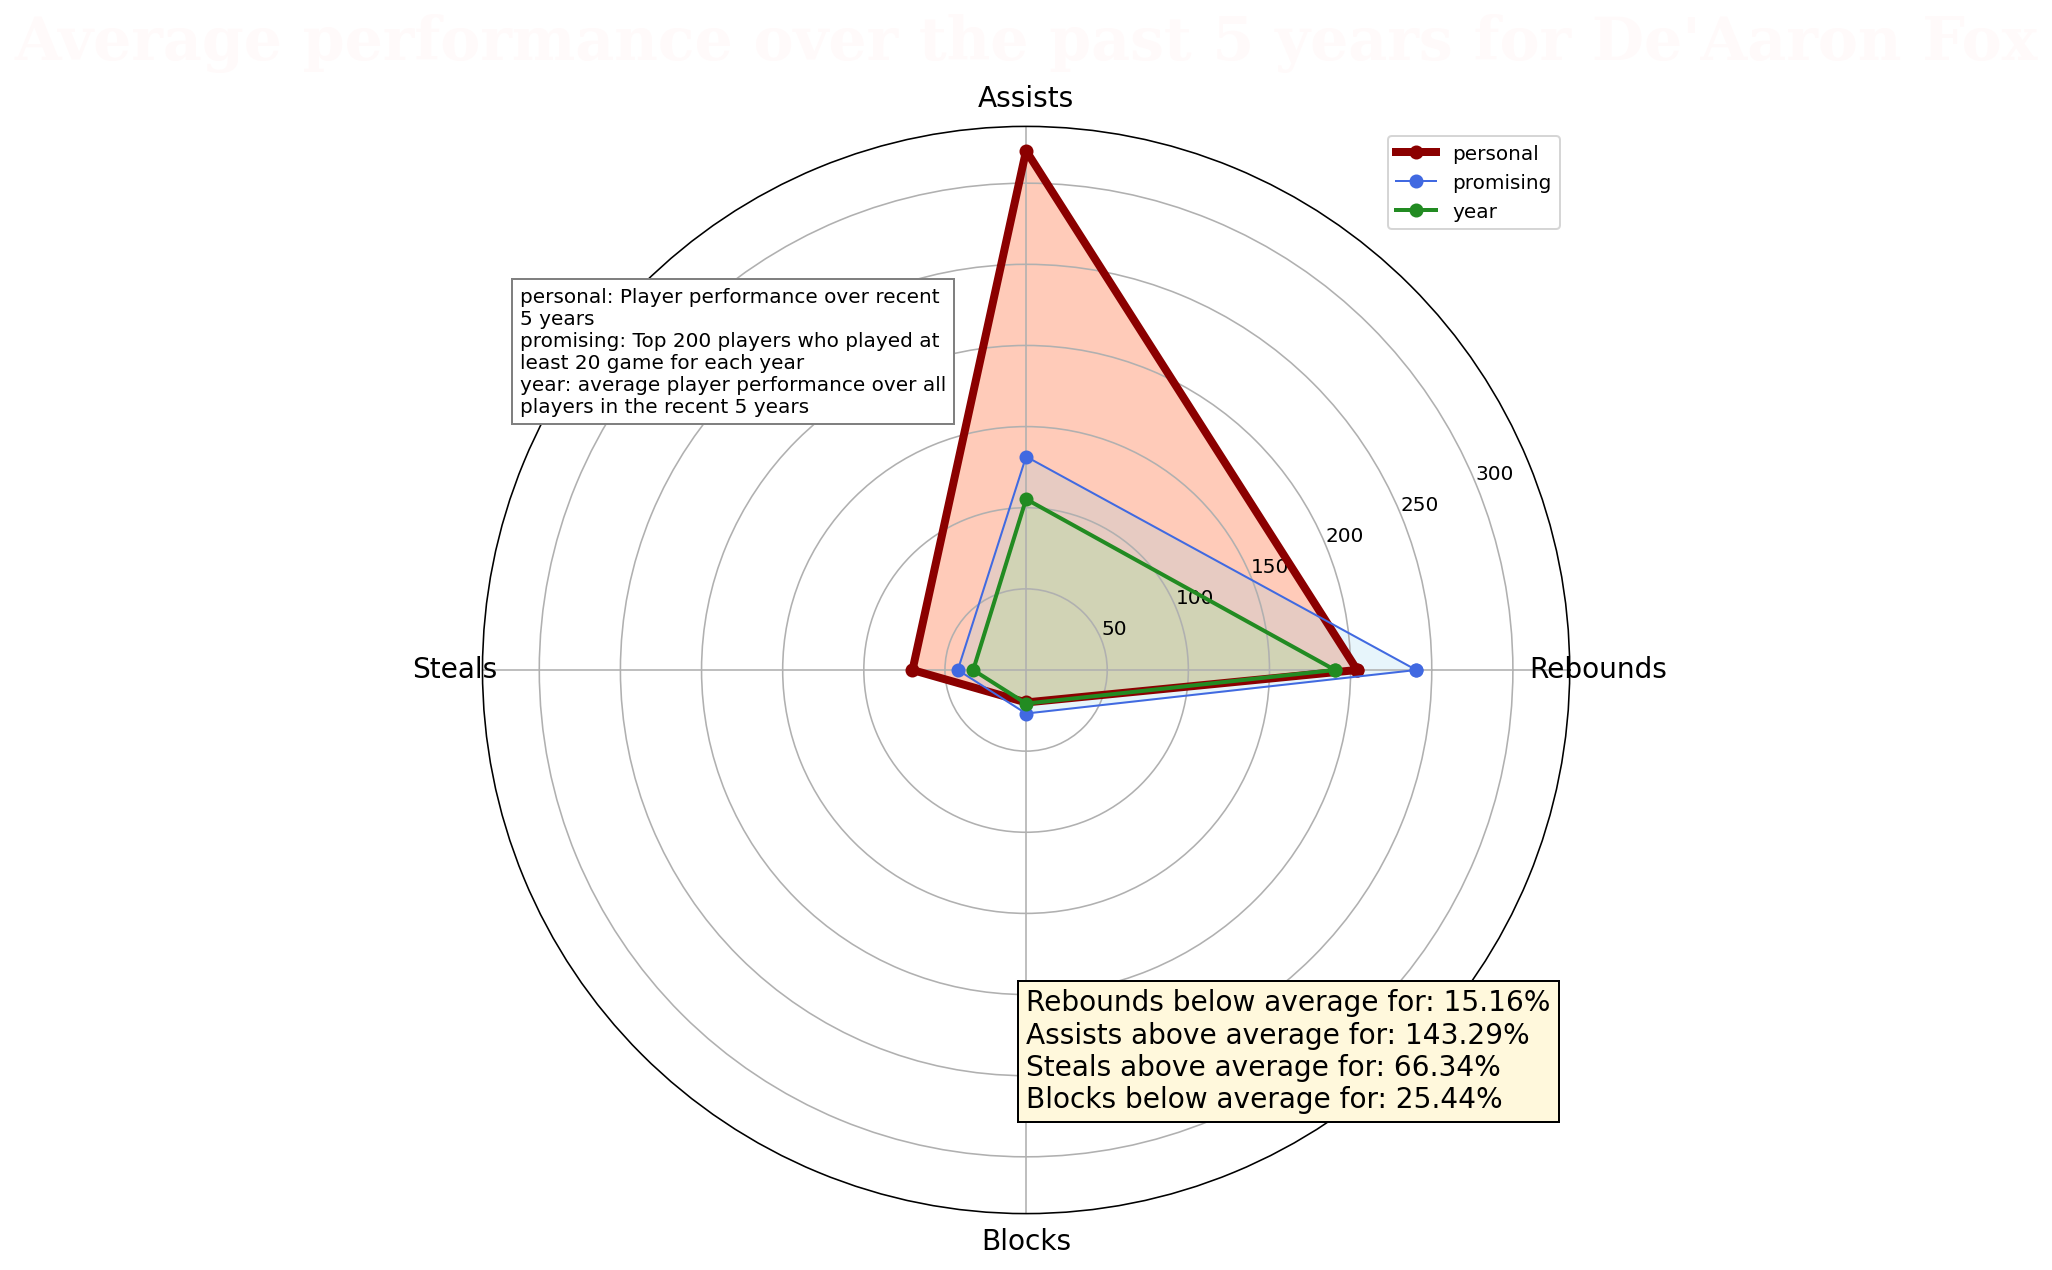

In [563]:
stats_year =rookie_recent_5_years[labels_A].mean()
stats_year = np.concatenate((stats_year,[stats_year[0]]))
stats = rookie_recent_5_years[rookie_recent_5_years['Player'] == list(Top3.index)[0]][labels_A].iloc[0]
stats = np.concatenate((stats,[stats[0]]))

p_high = (stats-stats_prom)/stats_prom*100

fig=plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, polar=True,alpha = 0.3)
ax.plot(angles, stats, 'o-', linewidth=4,c = 'darkred')
ax.plot(angles, stats_prom, 'o-', linewidth=1,c = 'royalblue')
ax.plot(angles, stats_year, 'o-', linewidth=2,c = 'forestgreen')
ax.fill(angles, stats, alpha=0.4,c = 'coral')
ax.fill(angles, stats_prom, alpha=0.2,c = 'skyblue')
ax.fill(angles, stats_year, alpha=0.25,c = 'lightgreen')
summary = ''
for i in range(len(p_high[:-1])):
    if np.sign(p_high[i])>0:
        summary += labels_A[i] + ' above average for: ' + str(round(p_high[i],2)) + '%\n'
    else:
        summary += labels_A[i] + ' below average for: ' + str(abs(round(p_high[i],2))) + '%\n'
ax.text(s = summary[:-1],x =1.5*np.pi,y = 270,size = 14,bbox = dict(facecolor = 'cornsilk',edgecolor =None ))
expl = 'personal: Player performance over recent\n5 years\n' + 'promising: Top 200 players who played at\nleast 20 game for'+' each year\nyear: average player performance over all\nplayers in the recent 5 years'
ax.text(s = expl,x =0.85*np.pi,y = 350,size = 10,bbox = dict(facecolor = 'white',edgecolor = 'gray' ))

ax.set_thetagrids(angles[:-1] * 180/np.pi, labels_A,size =14,)
fig.set_alpha(0)
ax.set_title('Average performance over the past 5 years for '+list(Top3.index)[0],fontsize=30,fontweight='bold',color = 'snow',fontname='serif',y=1.05)
ax.legend(['personal','promising','year'])
ax.grid(True)


stats = rookie_recent_5_years[rookie_recent_5_years['Player'] == list(Top3.index)[1]][labels_A].iloc[0]
stats = np.concatenate((stats,[stats[0]]))

p_high = (stats-stats_prom)/stats_prom*100
fig=plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=4,c = 'darkred')
ax.plot(angles, stats_prom, 'o-', linewidth=1,c = 'royalblue')
ax.plot(angles, stats_year, 'o-', linewidth=2,c = 'forestgreen')
ax.fill(angles, stats, alpha=0.4,c = 'coral')
ax.fill(angles, stats_prom, alpha=0.2,c = 'skyblue')
ax.fill(angles, stats_year, alpha=0.25,c = 'lightgreen')
summary = ''
for i in range(len(p_high[:-1])):
    if np.sign(p_high[i])>0:
        summary += labels_A[i] + ' above average for: ' + str(round(p_high[i],2)) + '%\n'
    else:
        summary += labels_A[i] + ' below average for: ' + str(abs(round(p_high[i],2))) + '%\n'
ax.text(s = summary[:-1],x =1.5*np.pi,y = 270,size = 14,bbox = dict(facecolor = 'cornsilk',edgecolor =None ))
expl = 'personal: Player performance over recent\n5 years\n' + 'promising: Top 200 players who played at\nleast 20 game for'+' each year\nyear: average player performance over all\nplayers in the recent 5 years'
ax.text(s = expl,x =0.85*np.pi,y = 350,size = 10,bbox = dict(facecolor = 'white',edgecolor = 'gray' ))
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels_A,size =14)
fig.set_alpha(0)
ax.set_title('Average performance over the past 5 years for '+list(Top3.index)[1],fontsize=30,fontweight='bold',color = 'snow',fontname='serif',y=1.05)
ax.legend(['personal','promising','year'])
ax.grid(True)


stats = rookie_recent_5_years[rookie_recent_5_years['Player'] == list(Top3.index)[2]][labels_A].iloc[0]
stats = np.concatenate((stats,[stats[0]]))

p_high = (stats-stats_prom)/stats_prom*100
fig=plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=4,c = 'darkred')
ax.plot(angles, stats_prom, 'o-', linewidth=1,c = 'royalblue')
ax.plot(angles, stats_year, 'o-', linewidth=2,c = 'forestgreen')
ax.fill(angles, stats, alpha=0.4,c = 'coral')
ax.fill(angles, stats_prom, alpha=0.2,c = 'skyblue')
ax.fill(angles, stats_year, alpha=0.25,c = 'lightgreen')
summary = ''
for i in range(len(p_high[:-1])):
    if np.sign(p_high[i])>0:
        summary += labels_A[i] + ' above average for: ' + str(round(p_high[i],2)) + '%\n'
    else:
        summary += labels_A[i] + ' below average for: ' + str(abs(round(p_high[i],2))) + '%\n'
ax.text(s = summary[:-1],x =1.5*np.pi,y = 270,size = 14,bbox = dict(facecolor = 'cornsilk',edgecolor =None ))
expl = 'personal: Player performance over recent\n5 years\n' + 'promising: Top 200 players who played at\nleast 20 game for'+' each year\nyear: average player performance over all\nplayers in the recent 5 years'
ax.text(s = expl,x =0.85*np.pi,y = 350,size = 10,bbox = dict(facecolor = 'white',edgecolor = 'gray' ))
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels_A,size =14)
fig.set_alpha(0)
ax.set_title('Average performance over the past 5 years for '+list(Top3.index)[2],fontsize=30,fontweight='bold',color = 'snow',fontname='serif',y=1.05)
ax.legend(['personal','promising','year'])
ax.grid(True)

<ipython-input-564-dcc55eb49b07>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years)


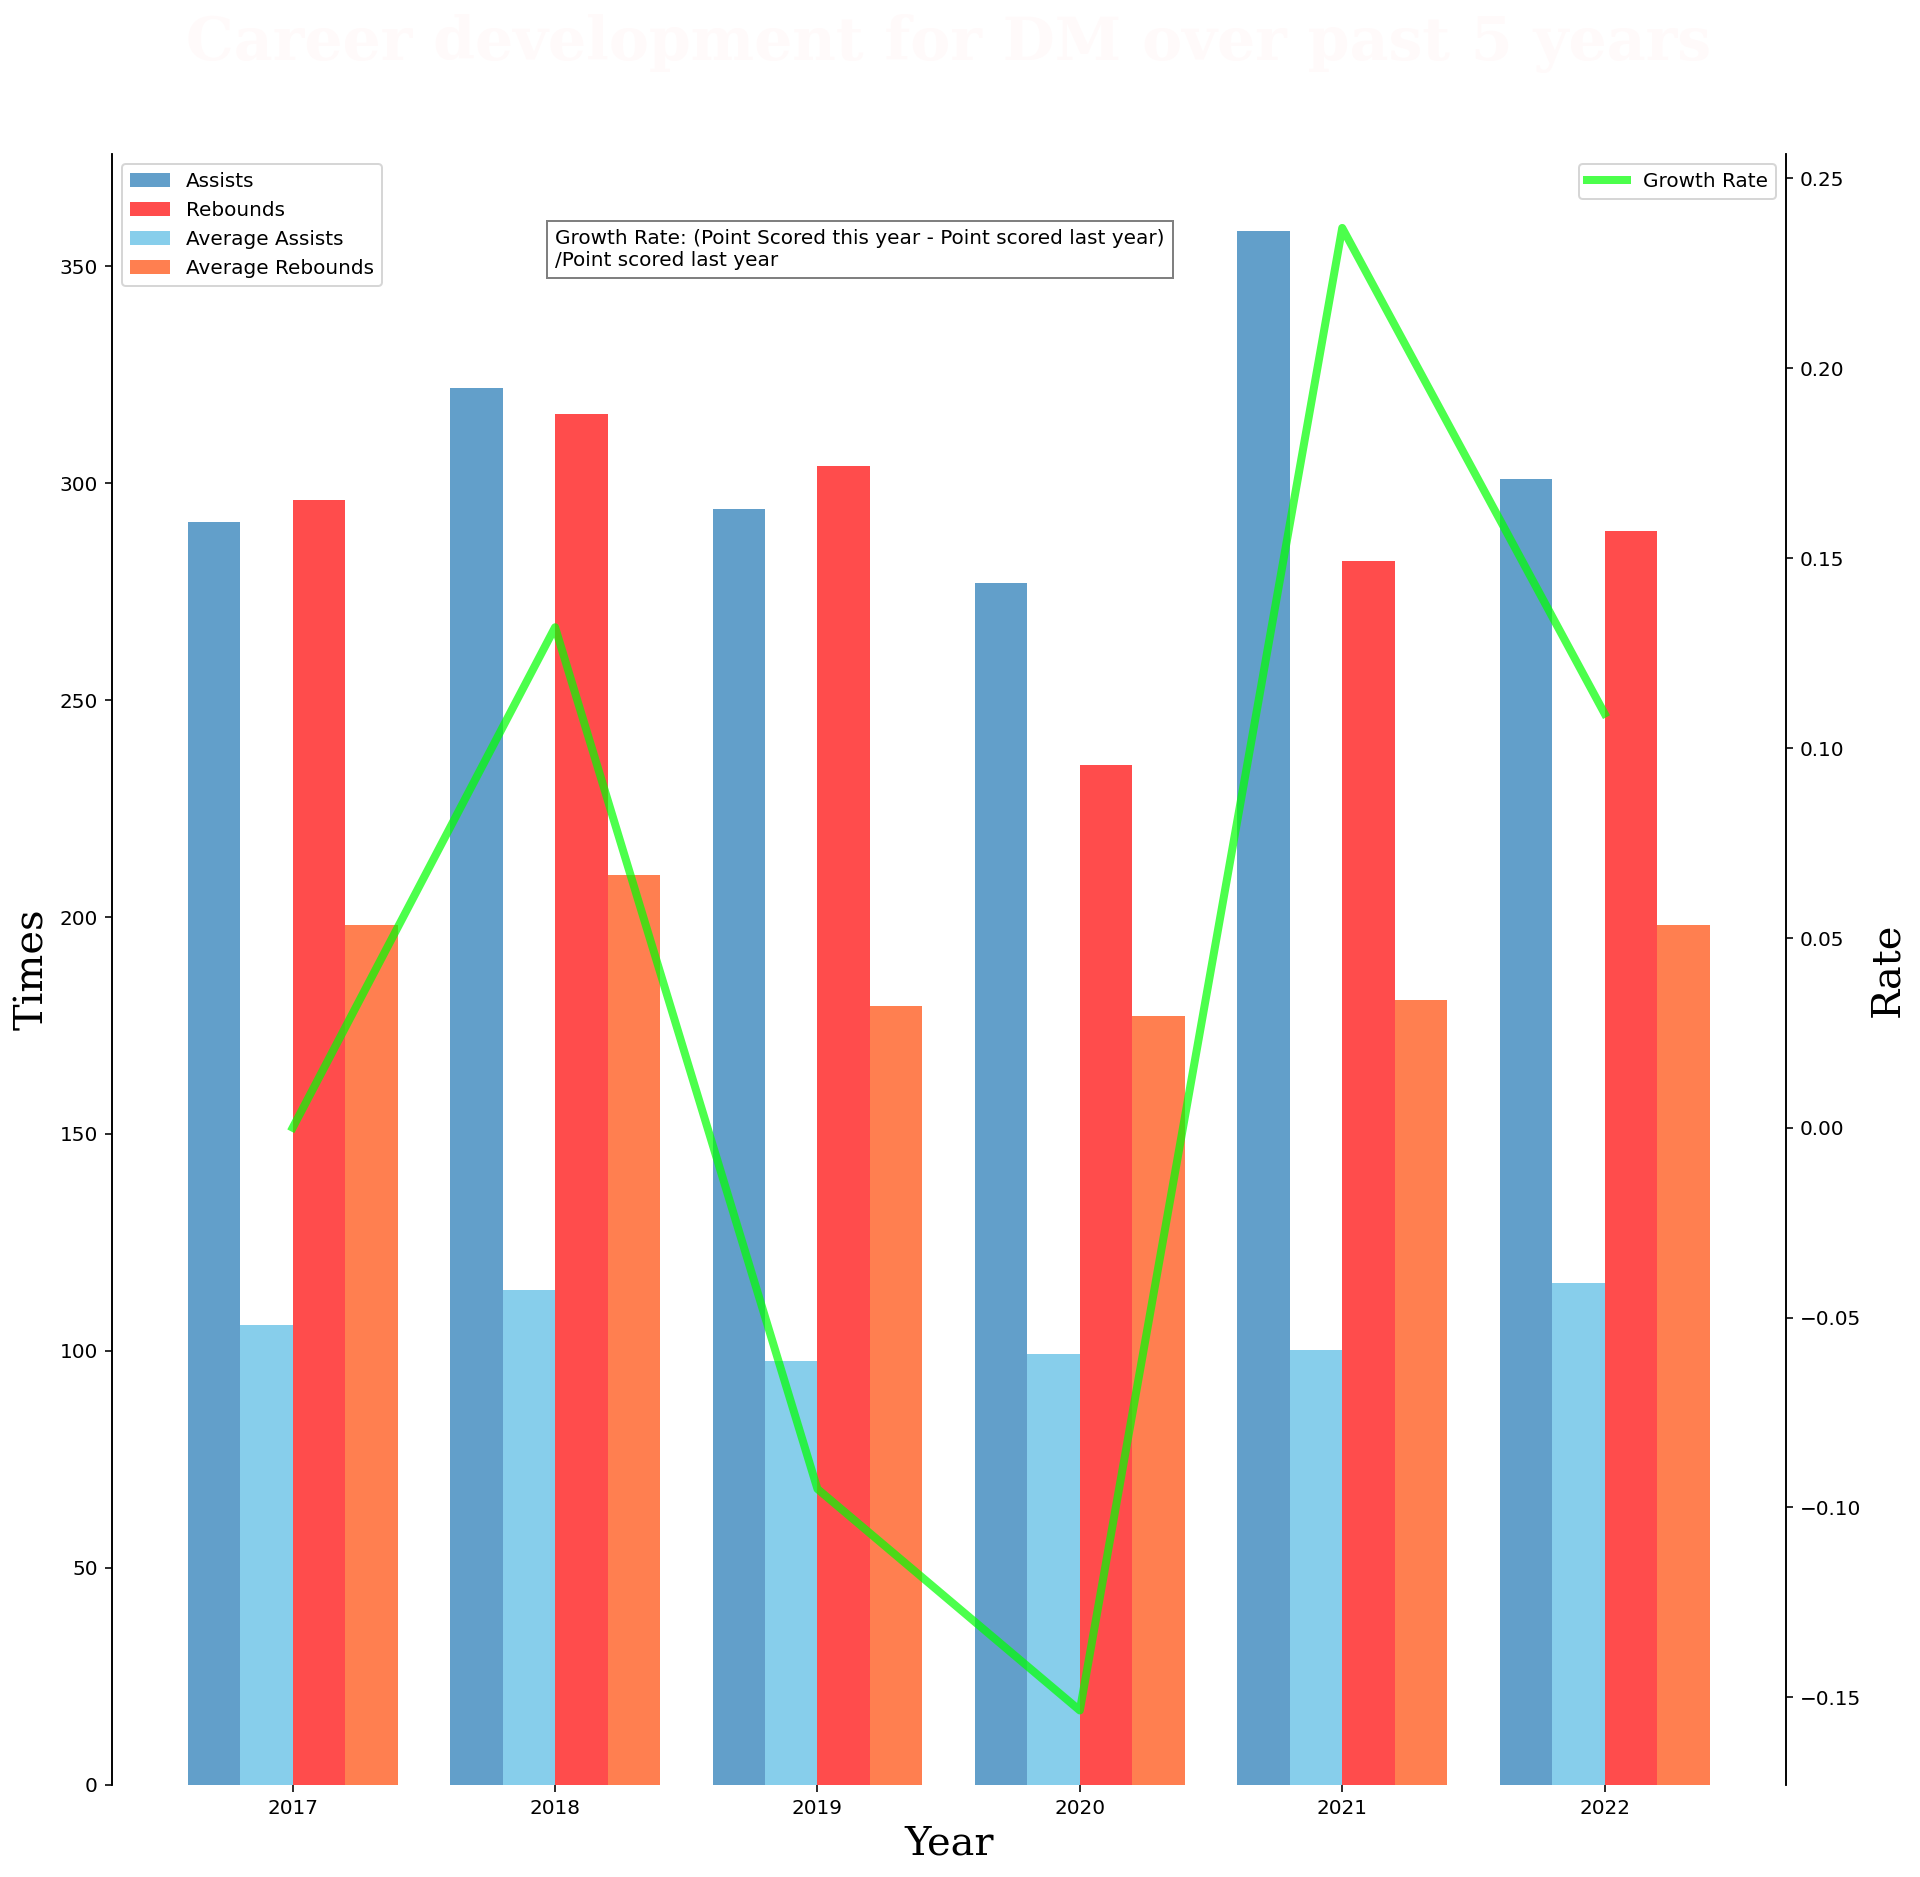

In [564]:
years = ['0','2017','2018','2019','2020','2021','2022']

fig,ax = plt.subplots(figsize = (15,15))
DM = rookie_recent_5_years[rookie_recent_5_years['Player'] == Top3.index[0]]

x = np.arange(0,6)
ax.bar(x-0.3,DM['Assists'],width = 0.2,label = 'Assists',alpha = 0.7)
ax.bar(x+0.1,DM['Rebounds'],width = 0.2,label = 'Rebounds',color = 'red',alpha = 0.7)
ax.bar(x-0.1, rookie_recent_5_years.groupby('Season Start Year')['Assists'].mean(),width = 0.2,color = 'skyblue')
ax.bar(x+0.3, rookie_recent_5_years.groupby('Season Start Year')['Rebounds'].mean(), width = 0.2, color='coral')
ax.set_xticklabels(years)
ax2 = ax.twinx()    
ax2.plot(x,DM['growth'],label = 'growth',c = 'lime',linewidth = 4,alpha = 0.7)
n_labels = ['Assists','Rebounds','Average Assists','Average Rebounds']
ax.legend(n_labels,loc =2)
ax.text(s ='Growth Rate: (Point Scored this year - Point scored last year)\n/Point scored last year',x =1,y = 350,size = 10,bbox = dict(facecolor = 'white',edgecolor = 'gray') )
ax2.legend(['Growth Rate'])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax.set_xlabel("Year",fontsize=20,fontname='serif')
ax.set_ylabel(r"Times",fontsize=20,fontname='serif')
ax2.set_ylabel(r"Rate",fontsize=20,fontname='serif')
ax.set_title('Career development for DM over past 5 years',fontsize=30,fontweight='bold',color = 'snow',fontname='serif',y=1.05)
fig.set_alpha(0.3)

<ipython-input-568-811b5506ca4f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years)


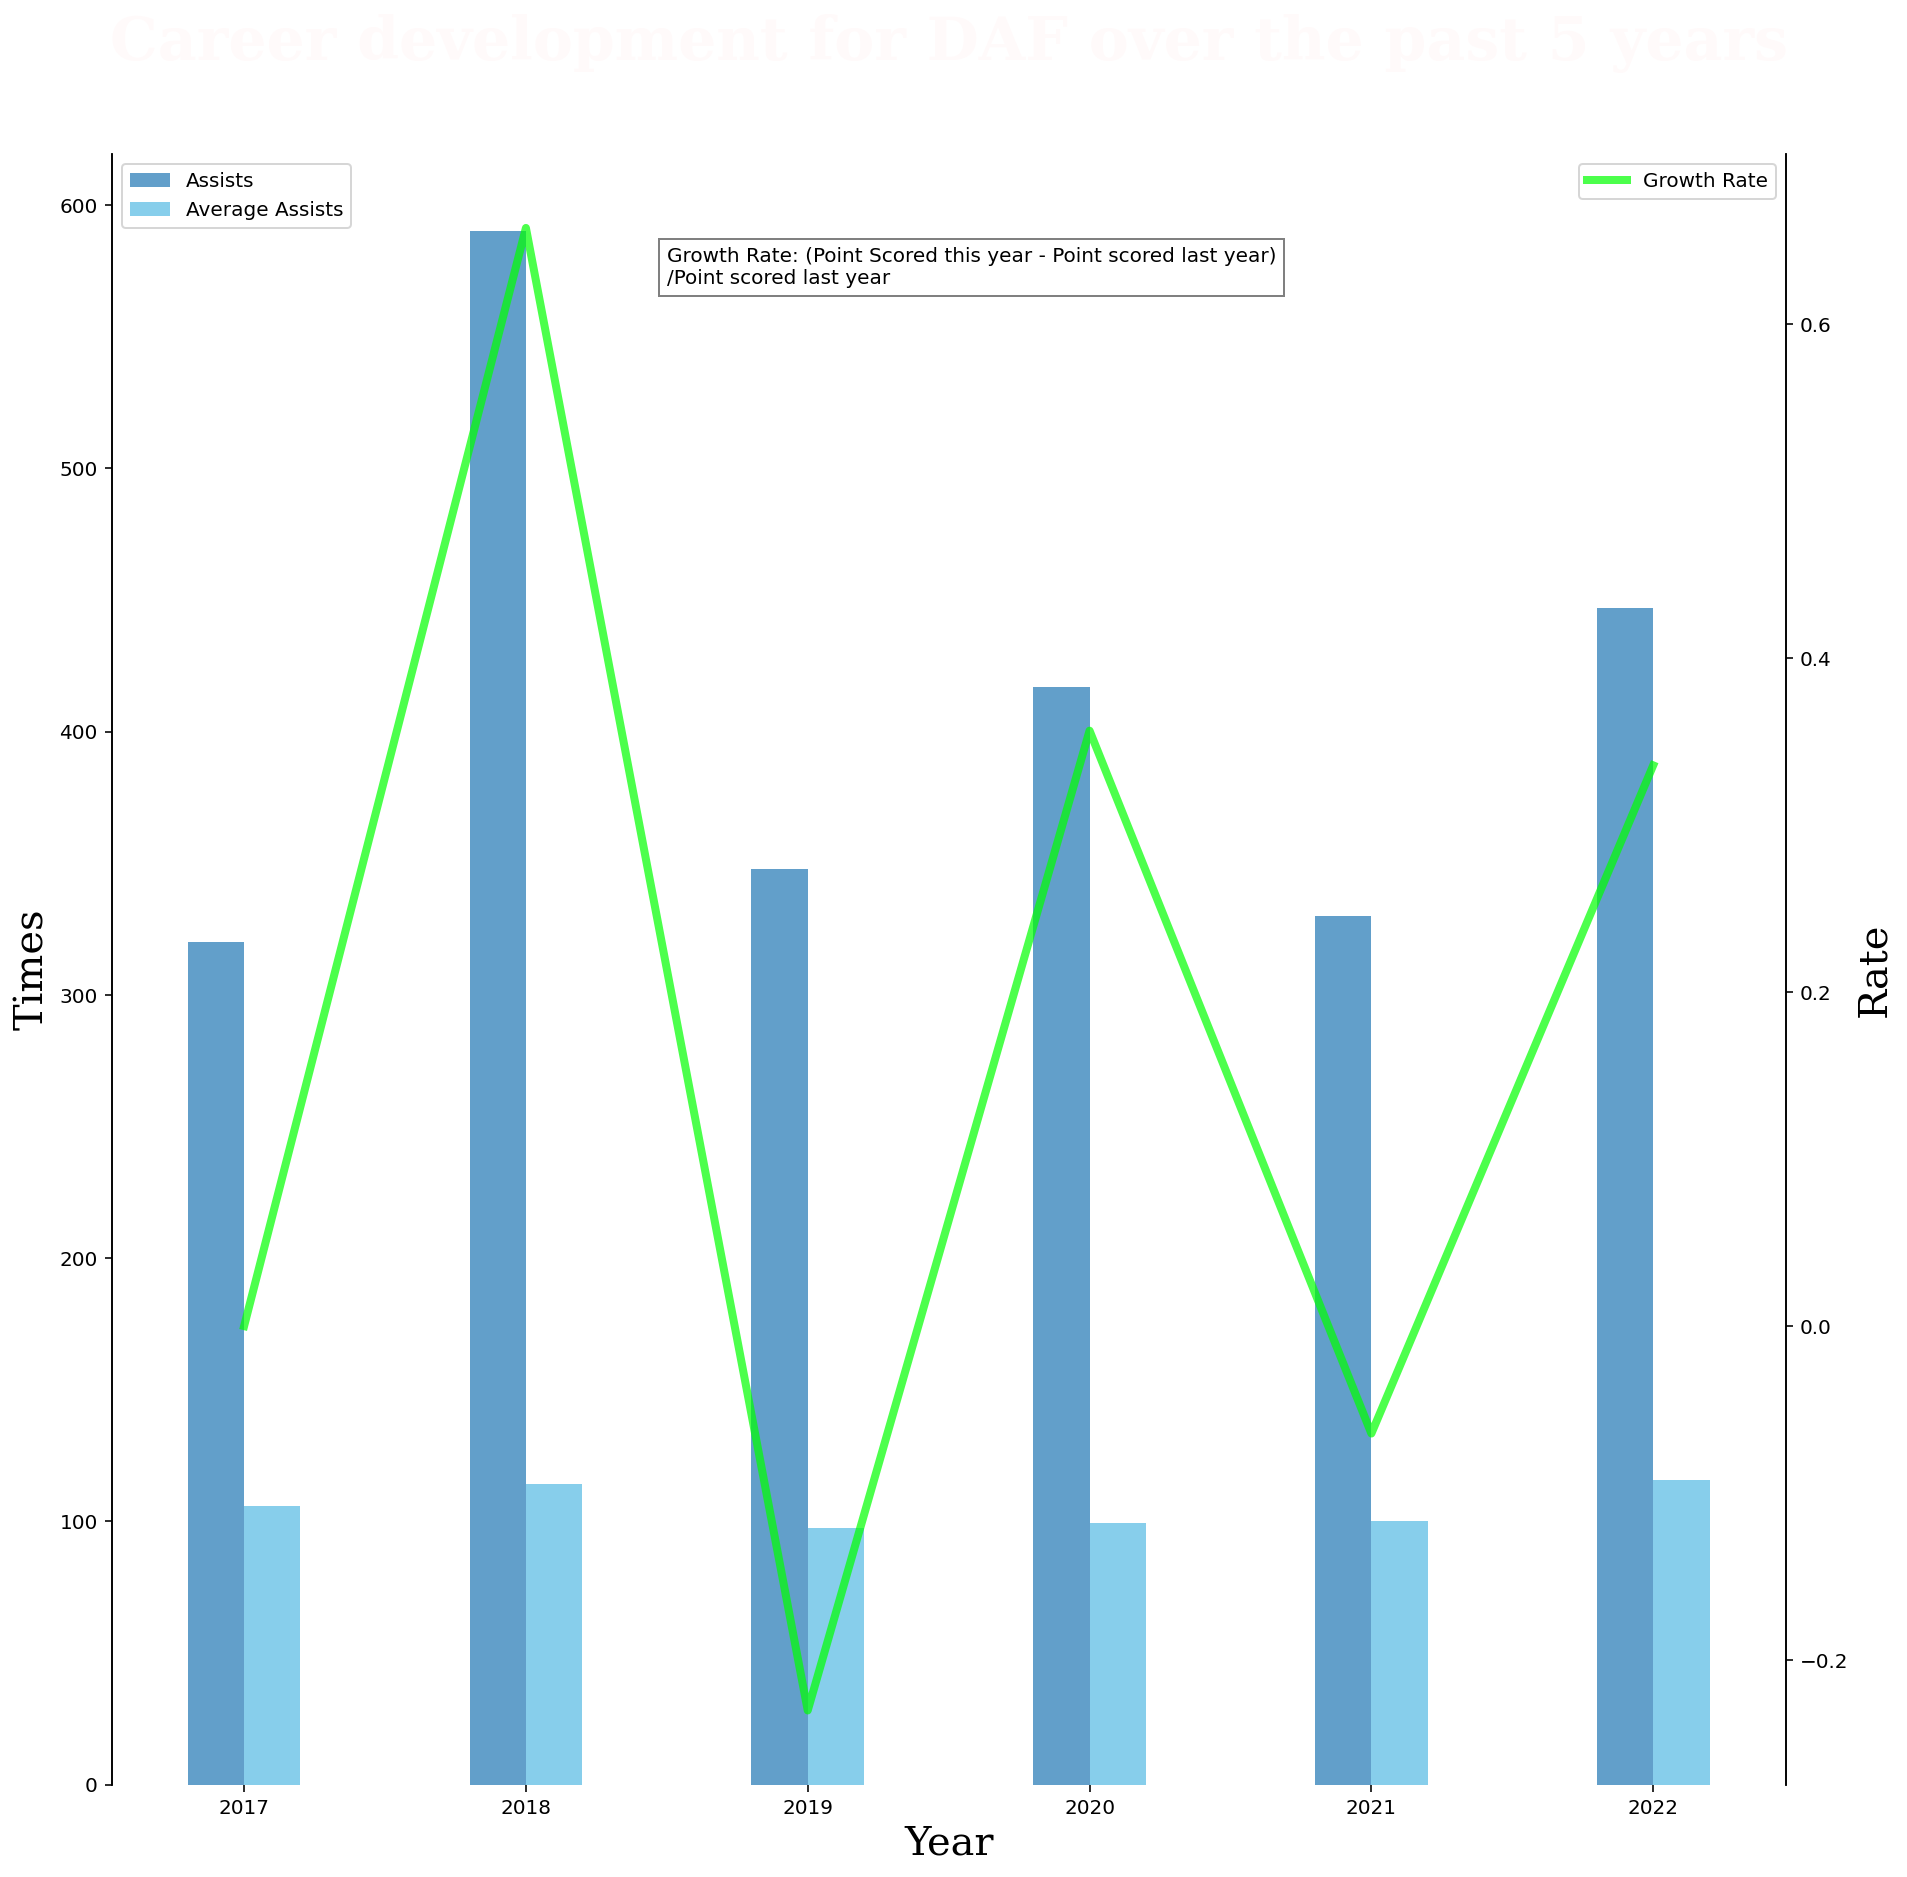

In [568]:
years = ['0','2017','2018','2019','2020','2021','2022']
fig,ax = plt.subplots(figsize = (15,15))
DAF = rookie_recent_5_years[rookie_recent_5_years['Player'] == Top3.index[2]]

x = np.arange(0,6)
ax.bar(x-0.1,DAF['Assists'],width = 0.2,label = 'Assists',alpha = 0.7)
# ax.bar(x+0.1,DAF['Turnovers'],width = 0.2,label = 'Turnovers',color = 'red',alpha = 0.7)
ax.bar(x+0.1, rookie_recent_5_years.groupby('Season Start Year')['Assists'].mean(),width = 0.2,color = 'skyblue')
# ax.bar(x+0.3, rookie_recent_5_years.groupby('Season Start Year')['Turnovers'].mean(), width = 0.2, color='coral')
ax.text(s ='Growth Rate: (Point Scored this year - Point scored last year)\n/Point scored last year',x =1.5,y = 570,size = 10,bbox = dict(facecolor = 'white',edgecolor = 'gray') )
ax.set_xticklabels(years)
ax2 = ax.twinx()    
ax2.plot(x,DAF['growth'],label = 'growth',c = 'lime',linewidth = 4,alpha = 0.7)
n_labels = ['Assists','Average Assists']
ax.legend(n_labels,loc =2)
ax2.legend(['Growth Rate'])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax.set_xlabel("Year",fontsize=20,fontname='serif')
ax.set_ylabel(r"Times",fontsize=20,fontname='serif')
ax2.set_ylabel(r"Rate",fontsize=20,fontname='serif')
ax.set_title('Career development for DAF over the past 5 years',fontsize=30,fontweight='bold',color = 'snow',fontname='serif',y=1.05)
fig.set_alpha(0.3)

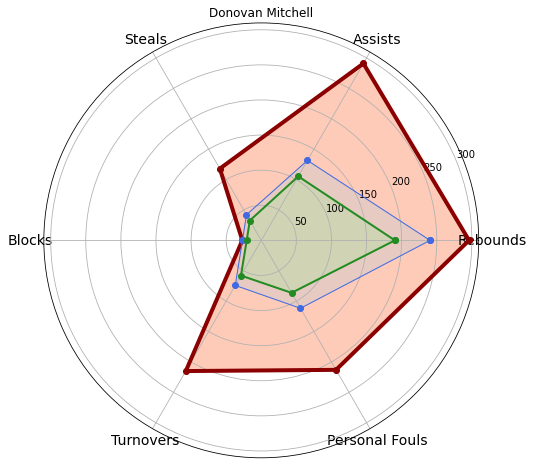

In [439]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats_prom = promising_players[labels].mean()
stats_prom = np.concatenate((stats_prom,[stats_prom[0]]))
angles = np.concatenate((angles,[angles[0]]))
stats_year =rookie_recent_5_years[labels].mean()
stats_year = np.concatenate((stats_year,[stats_year[0]]))
stats = rookie_recent_5_years[rookie_recent_5_years['Player'] == list(Top3.index)[0]][labels].iloc[0]
stats = np.concatenate((stats,[stats[0]]))
fig=plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=4,c = 'darkred')
ax.plot(angles, stats_prom, 'o-', linewidth=1,c = 'royalblue')
ax.plot(angles, stats_year, 'o-', linewidth=2,c = 'forestgreen')
ax.fill(angles, stats, alpha=0.4,c = 'coral')
ax.fill(angles, stats_prom, alpha=0.2,c = 'skyblue')
ax.fill(angles, stats_year, alpha=0.25,c = 'lightgreen')
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels,size =14)
fig.set_alpha(0)
ax.set_title(list(Top3.index)[0])
ax.grid(True)

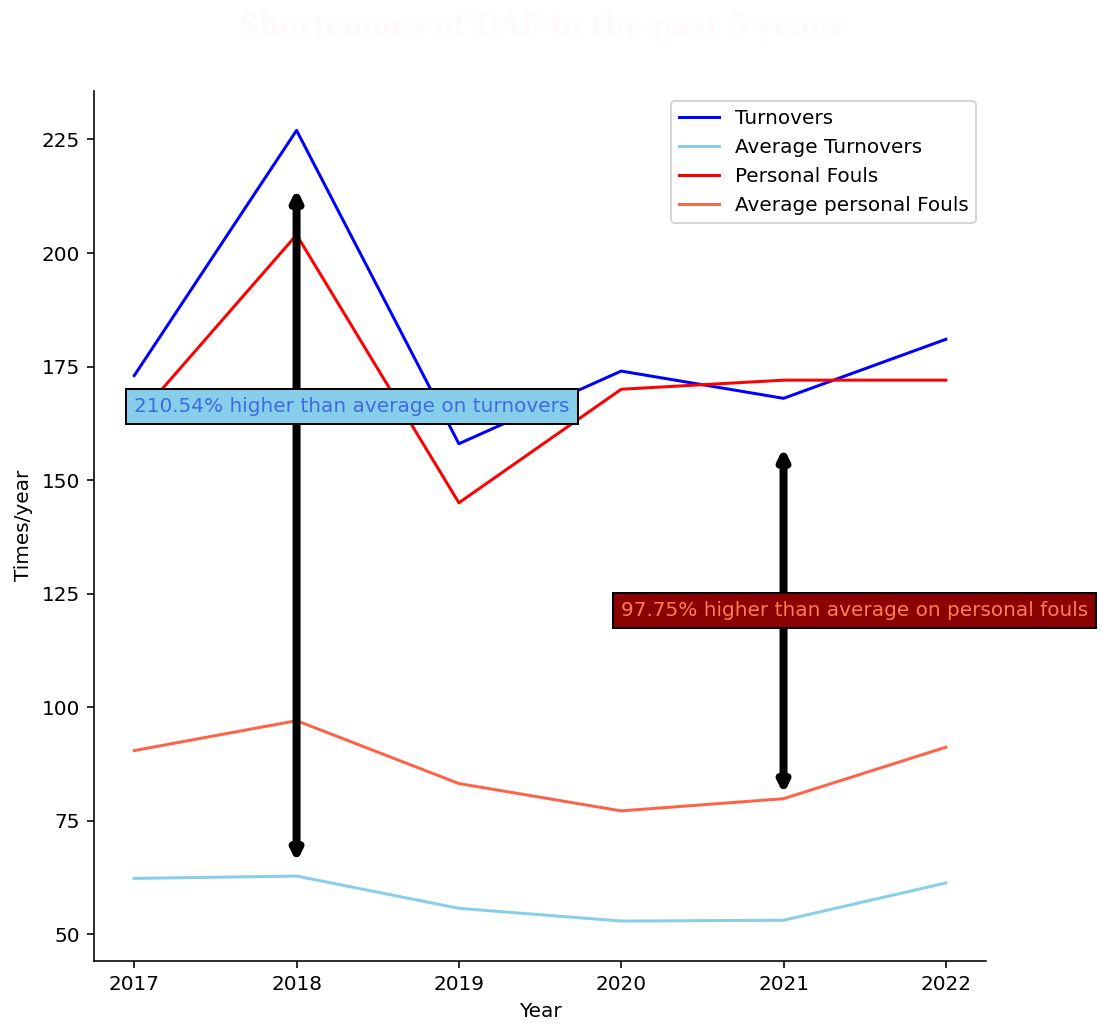

In [591]:
fig,ax = plt.subplots(figsize = (8,8))
DM = rookie_recent_5_years[rookie_recent_5_years['Player'] == list(Top3.index)[2]]
ax.plot(DM['Season Start Year'],DM['Turnovers'],color = 'blue')
ax.plot(rookie_recent_5_years.groupby('Season Start Year').mean().index,rookie_recent_5_years.groupby('Season Start Year')['Turnovers'].mean(),color = 'skyblue')
ax.plot(DM['Season Start Year'],DM['Personal Fouls'],color = 'red')
ax.plot(rookie_recent_5_years.groupby('Season Start Year').mean().index,rookie_recent_5_years.groupby('Season Start Year')['Personal Fouls'].mean(),color ='tomato')
labels = ['Turnovers','Average Turnovers','Personal Fouls','Average personal Fouls']
ax.legend(labels)
ax.spines['top'].set_visible(False)
ax.set_title('Shortcomes of DAF in the past 5 years',fontsize = 14,fontweight = 'bold',color = 'snow',fontname='serif',y=1.05)
ax.annotate('',
            xy=(2018, 215),
            xytext=(2018, 65),
            va='center',
            ha='center',
            color='skyblue',
            arrowprops={'arrowstyle': '<->',  'lw':4})
ax.annotate('',
            xy=(2021, 158),
            xytext=(2021, 80),
            va='center',
            ha='center',
            color='skyblue',
            arrowprops={'arrowstyle': '<->',  'lw':4})
ax.set_ylabel('Times/year')
ax.set_xlabel('Year')
T_higher = (DM['Turnovers'].mean()-rookie_recent_5_years.groupby('Season Start Year')['Turnovers'].mean().mean())/rookie_recent_5_years.groupby('Season Start Year')['Turnovers'].mean().mean()*100
T_higher = round(T_higher,2)
ax.annotate(str(T_higher) +'% higher than average on turnovers',xy = (2017,165),color = 'royalblue',bbox=dict(facecolor = 'skyblue',edgecolor = None))
PF_higher = (DM['Personal Fouls'].mean()-rookie_recent_5_years.groupby('Season Start Year')['Personal Fouls'].mean().mean())/rookie_recent_5_years.groupby('Season Start Year')['Personal Fouls'].mean().mean()*100
PF_higher = round(PF_higher,2)
ax.text(s =str(PF_higher) +'% higher than average on personal fouls',x = 2020,y = 120,color = 'coral',bbox = dict(facecolor = 'darkred',edgecolor = None))

ax.spines['right'].set_visible(False)

<ipython-input-321-8a7a304dd6a7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(years)


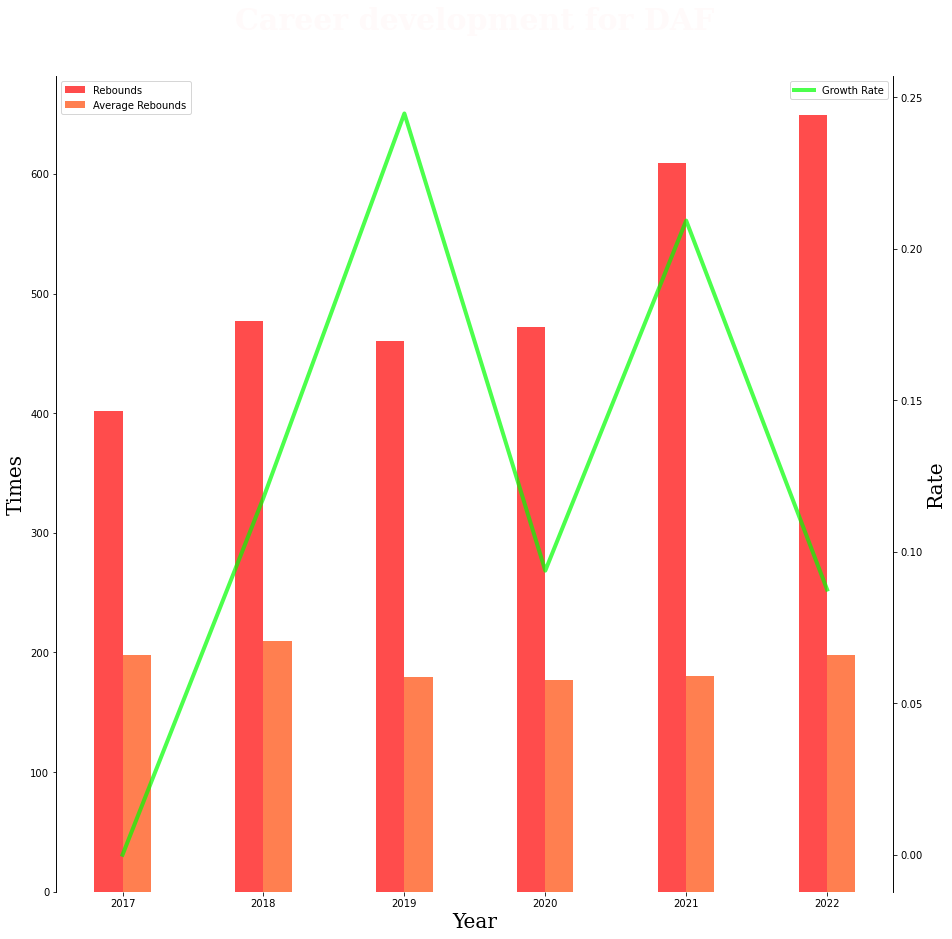

In [321]:
years = ['0','2017','2018','2019','2020','2021','2022']

fig,ax = plt.subplots(figsize = (15,15))
JT = rookie_recent_5_years[rookie_recent_5_years['Player'] == Top3.index[1]]

x = np.arange(0,6)

ax.bar(x-0.1,JT['Rebounds'],width = 0.2,label = 'Rebounds',color = 'red',alpha = 0.7)
ax.bar(x+0.1, rookie_recent_5_years.groupby('Season Start Year')['Rebounds'].mean(), width = 0.2, color='coral')
ax.set_xticklabels(years)
ax2 = ax.twinx()    
ax2.plot(x,JT['growth'],label = 'growth',c = 'lime',linewidth = 4,alpha = 0.7)
n_labels = ['Rebounds','Average Rebounds']
ax.legend(n_labels,loc =2)
ax2.legend(['Growth Rate'])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax.set_xlabel("Year",fontsize=20,fontname='serif')
ax.set_ylabel(r"Times",fontsize=20,fontname='serif')
ax2.set_ylabel(r"Rate",fontsize=20,fontname='serif')
ax.set_title('Career development for DAF',fontsize=30,fontweight='bold',color = 'snow',fontname='serif',y=1.05)
fig.set_alpha(0.3)

# Part Team Analysis

In [541]:
df_regular = df[df['Season Type']=='Regular Season']
df_last = df_regular[df_regular['Season Start Year']==2022]

In [542]:
team_sum = df_last.groupby('Team').sum()
team_sum = team_sum.drop(['Team ID','Minutes Played','Rank','Season Start Year','Player ID','FG %','3-Pt FG %','FT %','Personal Fouls','AST/TOV','STL/TOV'],axis=1)

In [543]:
team_sum_n = team_sum.copy()
for col in team_sum_n.columns:
    team_sum_n[col] = team_sum[col]/82
team_sum_n['FG %'] = team_sum['FG Made']/team_sum['FG Attempts']
team_sum_n['FT %'] = team_sum['FT Made']/team_sum['FT Attempts']
team_sum_n['3-Pt FG %'] = team_sum['3-Pt FG Made']/team_sum['3-Pt FG Attempts']
team_sum_n['AST/TOV'] = team_sum['Assists']/team_sum['Turnovers']
team_sum_n['STL/TOV'] = team_sum['Steals']/team_sum['Turnovers']
team_sum_n['Defense'] = team_sum_n['Defensive Rebounds']+team_sum_n['Steals']+team_sum_n['Blocks']

team_sum_n

,Games Played,FG Made,FG Attempts,3-Pt FG Made,3-Pt FG Attempts,FT Made,FT Attempts,Offensive Rebounds,Defensive Rebounds,Rebounds,...,Blocks,Turnovers,Points Scored,Efficency,FG %,FT %,3-Pt FG %,AST/TOV,STL/TOV,Defense
Team,,,,,,,,,,,,,,,,,,,,,
ATL,11.451220,48.024390,100.902439,12.134146,34.682927,21.390244,26.048780,12.585366,36.268293,48.853659,...,5.329268,13.219512,129.573171,147.012195,0.475949,0.821161,0.349859,1.974170,0.598708,49.512195
BKN,11.560976,41.573171,87.804878,14.292683,37.207317,17.182927,22.402439,9.890244,33.463415,43.353659,...,6.292683,12.585366,114.621951,135.146341,0.473472,0.767011,0.384136,2.131783,0.642442,47.841463
BOS,10.926829,43.317073,91.268293,16.719512,44.317073,17.890244,22.048780,10.000000,37.024390,47.024390,...,5.475610,12.890244,121.243902,142.365854,0.474613,0.811394,0.377270,2.105014,0.503311,48.987805
CHA,8.768293,35.426829,79.695122,10.024390,30.207317,14.719512,19.243902,8.170732,26.560976,34.731707,...,4.402439,11.658537,95.597561,102.097561,0.444529,0.764892,0.331853,1.827406,0.558577,37.475610
CHI,10.560976,42.536585,86.865854,10.585366,29.451220,17.841463,22.000000,8.865854,34.829268,43.695122,...,4.841463,12.646341,113.500000,133.475610,0.489681,0.810976,0.359420,1.923819,0.651880,47.914634
CLE,9.609756,40.243902,81.829268,10.780488,29.292683,16.865854,21.719512,9.195122,28.524390,37.719512,...,4.597561,11.902439,108.134146,123.219512,0.491803,0.776530,0.368027,2.019467,0.594262,40.195122
DAL,10.743902,40.463415,84.536585,14.768293,40.097561,18.560976,24.378049,7.219512,30.792683,38.012195,...,3.853659,11.560976,114.256098,122.646341,0.478650,0.761381,0.368309,1.901899,0.517932,40.634146
DEN,11.146341,46.182927,90.085366,11.719512,31.024390,17.475610,23.243902,10.951220,35.158537,46.109756,...,4.621951,14.280488,121.560976,145.719512,0.512657,0.751836,0.377752,2.080273,0.537148,47.451220
DET,9.670732,37.268293,80.817073,9.951220,28.463415,18.097561,23.865854,10.719512,29.000000,39.719512,...,3.487805,13.975610,102.585366,111.365854,0.461144,0.758304,0.349614,1.602967,0.462478,38.951220


In [544]:
df_playoffs = df[(df['Season Type']=='Playoffs')&(df['Season Start Year']==2022)]

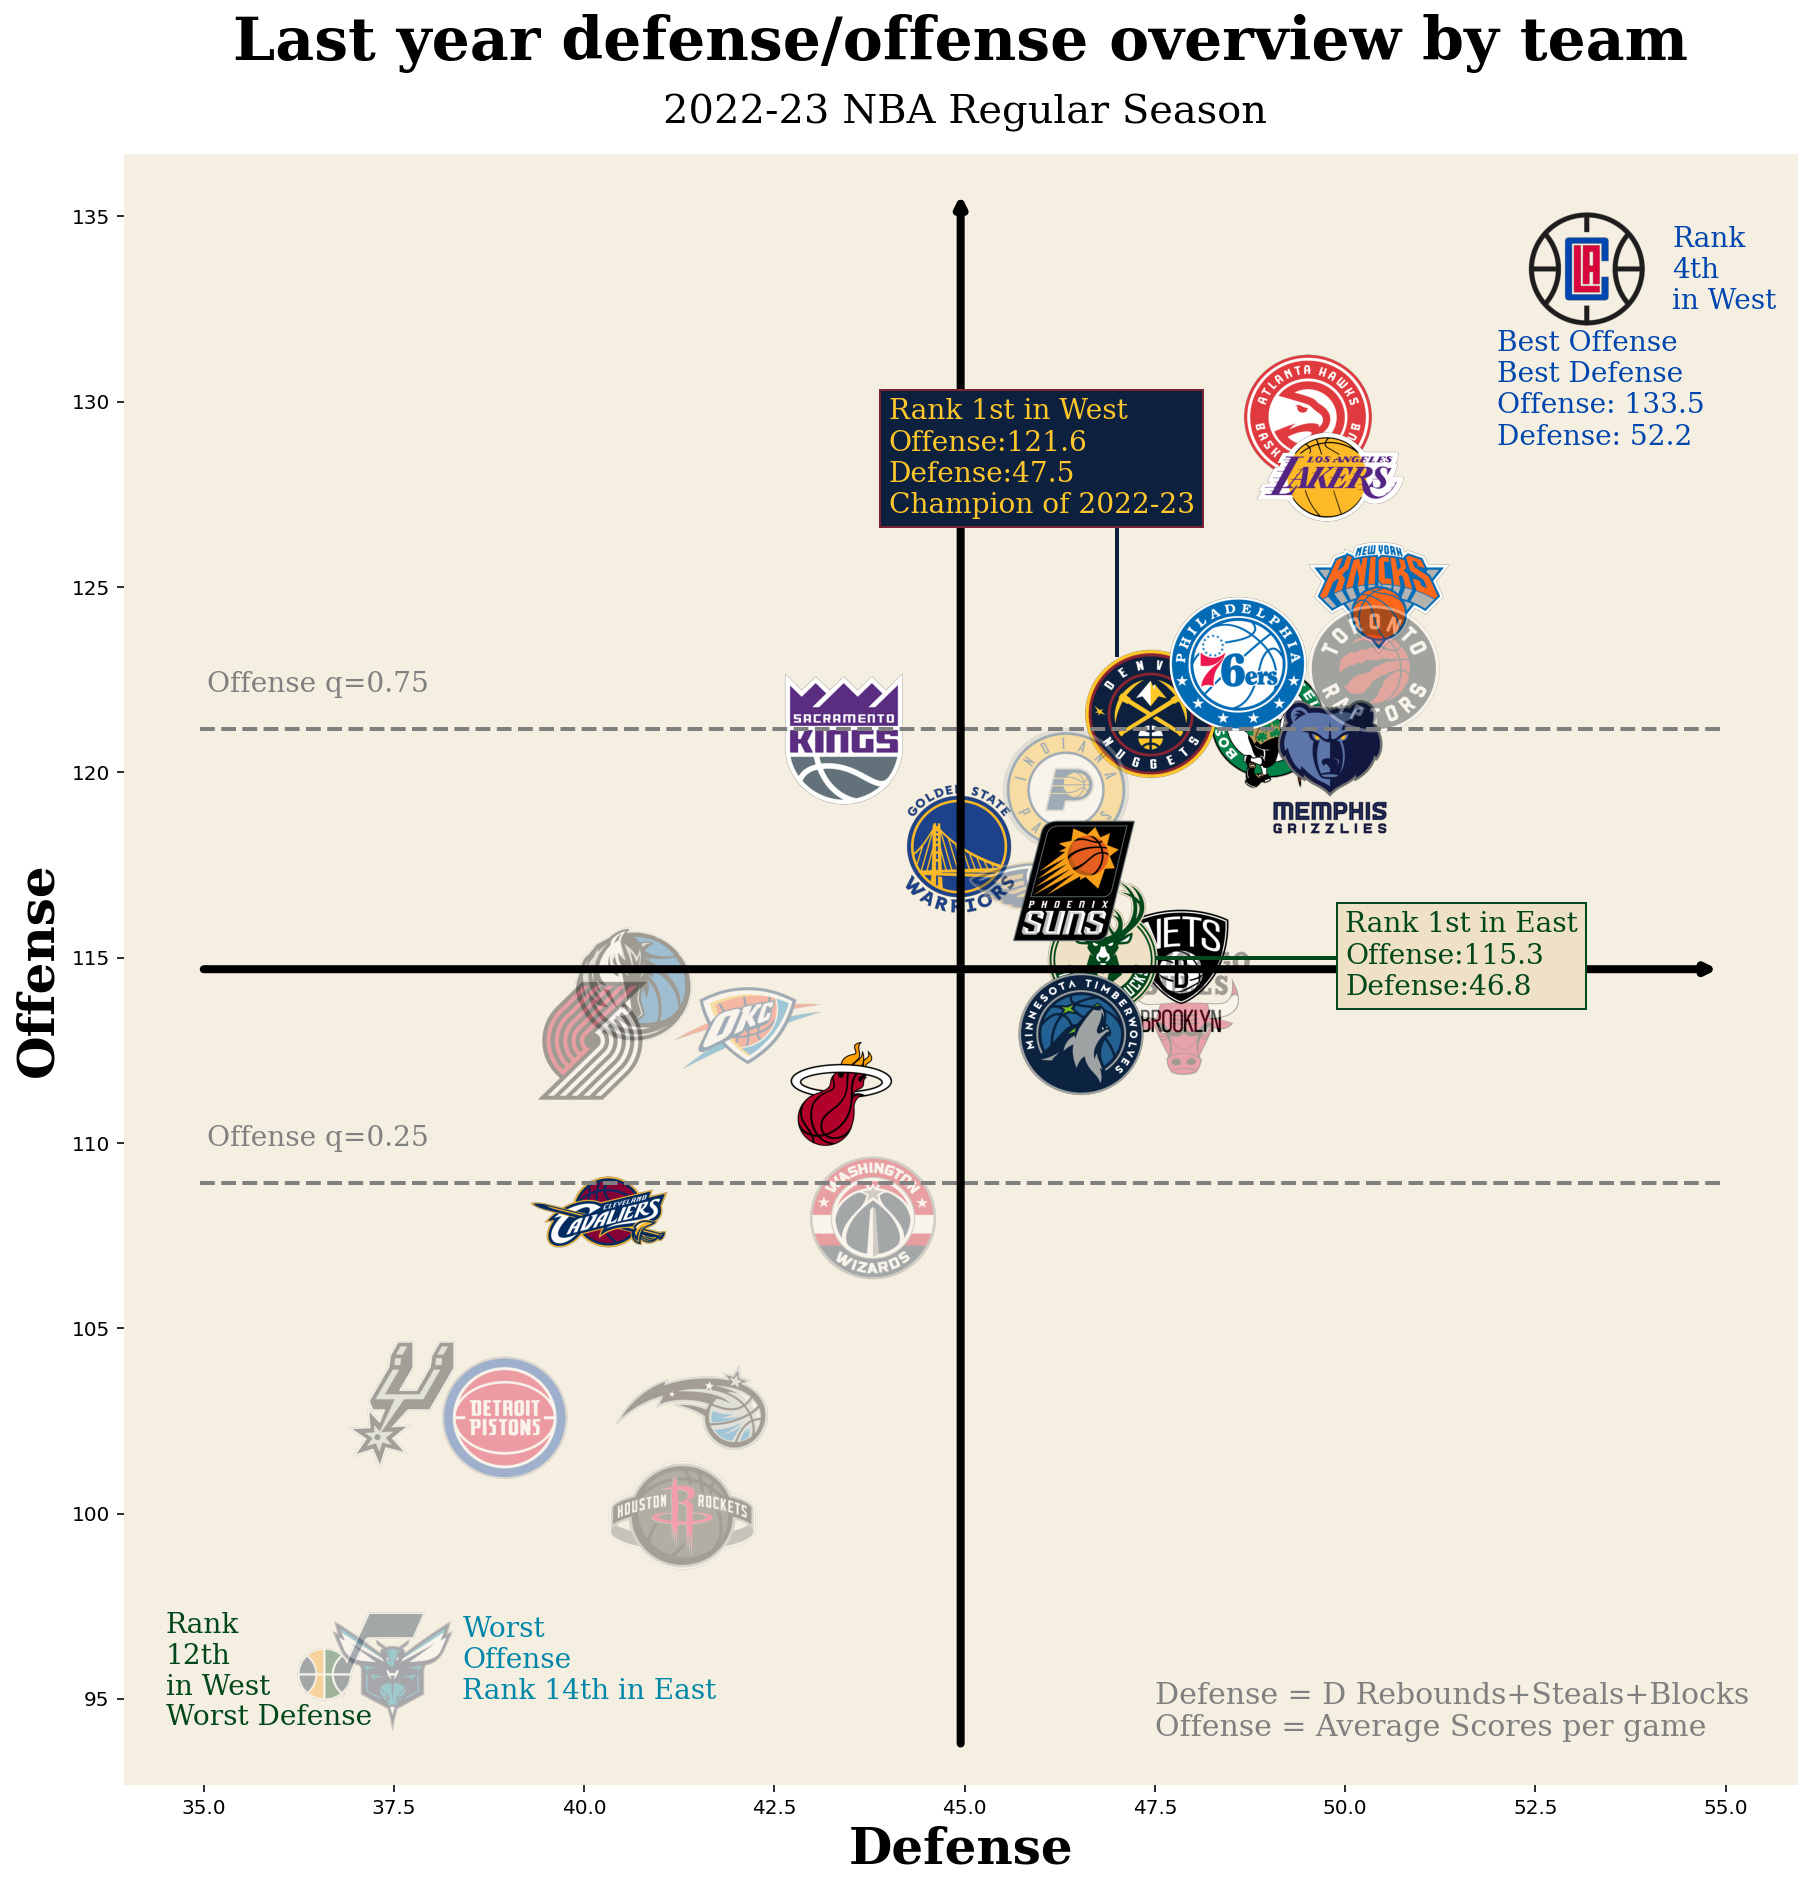

In [545]:
o = team_sum_n['Points Scored'].mean()
d = team_sum_n['Defense'].mean()
import matplotlib.image as image
from PIL import Image
from matplotlib import collections

# figure and ax
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_xlim(d-11,d+11)
ax.set_ylim(o-22,o+22)
ax.set_facecolor('#f5efe1')
# plt.grid()
# use seaborn to draw a nice scatter plot FAST:
# sns.set_style('dark',{'axes.facecolor':'black'})
# y='Points Scored', x='Defense', size='FG %',legend = False,data=team_sum_n, ax=ax


ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Defense',fontsize=25,fontweight='bold',fontname='serif')
ax.set_ylabel('Offense',fontsize=25,fontweight='bold',fontname='serif')

ax.set_title('Last year defense/offense overview by team',fontsize=30,fontweight='bold',fontname='serif',y=1.05)

ax.annotate('',
            xy=(d, o-21),
            xytext=(d, o+21),
            va='center',
            ha='center',
            color='black',
            arrowprops={'arrowstyle': '<-',  'lw':4})

ax.annotate('',
            xy=(d-10, o),
            xytext=(d+10, o),
            va='center',
            ha='center',
            color='black',
            arrowprops={'arrowstyle': '<-',  'lw':4})

ax.hlines(y=108.926829,xmin=d-10,xmax=d+10,color='gray',linewidth=2,linestyles ="dashed")
ax.hlines(y=121.155488,xmin=d-10,xmax=d+10,color='gray',linewidth=2,linestyles ="dashed")
ax.text(36.5,108.926829+1,"Offense q=0.25",fontsize=14,fontname='serif',color='gray',ha='center')
ax.text(36.5,121.155488+1,"Offense q=0.75",fontsize=14,fontname='serif',color='gray',ha='center')

size=4.2
#Use the extent keyword of imshow. The order of the argument is [left, right, bottom, top]
for i in team_sum_n.index.values:
    img = image.imread("./PIC/"+i+".png")
    x = team_sum_n.loc[i,'Defense']
    y = team_sum_n.loc[i,'Points Scored']
    if i in df_playoffs['Team'].unique():
        ax.imshow(img,extent=[x-size/4,x+size/4,y-size/2,y+size/2],aspect='auto')
    else:
        ax.imshow(img,extent=[x-size/4,x+size/4,y-size/2,y+size/2],aspect='auto',alpha=0.35)

ax.text(52,128,"Best Offense\nBest Defense\nOffense: 133.5 \nDefense: 52.2 \n",fontsize=14,fontname='serif',color='#0046ae')
ax.text(54.3,132.5,"Rank\n4th\nin West",fontsize=14,fontname='serif',color='#0046ae')

ax.text(34.5,95.1,"Rank\n12th\nin West",fontsize=14,fontname='serif',color='#00471b')
ax.text(34.5,94.3,"Worst Defense",fontsize=14,fontname='serif',color='#00471b')

ax.text(38.4,95,"Worst\nOffense\nRank 14th in East",fontsize=14,fontname='serif',color='#0086a8')

ax.text(44,127,"Rank 1st in West\nOffense:121.6\nDefense:47.5\nChampion of 2022-23",fontsize=14,fontname='serif',color='#ffc72b',bbox=dict(facecolor='#0d213e', edgecolor='#782334'))
ax.vlines(x=47,ymin=123.1,ymax=127,color='#0d213e',linewidth=2, clip_on=False)

ax.text(50,114,"Rank 1st in East\nOffense:115.3\nDefense:46.8",fontsize=14,fontname='serif',color='#00471b',bbox=dict(facecolor='#eee1c6', edgecolor='#00471b'))
ax.hlines(y=115,xmin=47.5,xmax=50,color='#00471b',linewidth=2, clip_on=False)

ax.text(47.5,94,"Defense = D Rebounds+Steals+Blocks\nOffense = Average Scores per game",fontsize=15,fontname='serif',color='gray')
ax.text(45,137.5,"2022-23 NBA Regular Season",fontsize=20,fontname='serif',ha='center')

# ax.vlines(x=41.323171,ymin=o-18,ymax=o+18.5,color='gray',linewidth=2, clip_on=False,linestyles ="dashed")
# ax.vlines(x=48.417683,ymin=o-18,ymax=o+18.5,color='gray',linewidth=2, clip_on=False,linestyles ="dashed")
# ax.text(41.323171,133.5,"Defense q=0.25",fontsize=14,fontname='serif',color='gray',ha='center')
# ax.text(48.417683,133.5,"Defense q=0.75",fontsize=14,fontname='serif',color='gray',ha='center')

plt.savefig('./first.jpg',bbox_inches='tight')
plt.show()

# Position Analysis

In [549]:
df_nba = df[(df["Season Start Year"]>=2012)&(df["Season Type"]=="Regular Season")]
df_nba["Efficency"]= (df_nba["Points Scored"]+df_nba["Rebounds"]+df_nba["Assists"]+df_nba["Steals"]+df_nba["Blocks"]-(df_nba["FG Attempts"]-df_nba["FG Made"])-(df_nba["FT Attempts"]-df_nba["FT Made"])-df["Turnovers"])/df_nba["Games Played"]

<ipython-input-549-cec6c9f3f79b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba["Efficency"]= (df_nba["Points Scored"]+df_nba["Rebounds"]+df_nba["Assists"]+df_nba["Steals"]+df_nba["Blocks"]-(df_nba["FG Attempts"]-df_nba["FG Made"])-(df_nba["FT Attempts"]-df_nba["FT Made"])-df["Turnovers"])/df_nba["Games Played"]


### Define the equation score of Center position
center_score = (Blocks + Rebounds - Turnovers)/Games Played

In [550]:
df_nba["center_score"] = (df_nba["Blocks"]+df_nba["Rebounds"]-df_nba["Turnovers"])/df_nba["Games Played"]
grouped_data_center = df_nba.groupby("Player")[["Efficency","center_score"]].mean()
sorted_data_center = grouped_data_center.sort_values(by="center_score", ascending=False).head(100)
df_center = sorted_data_center.reset_index()

<ipython-input-550-bfe74ea275a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba["center_score"] = (df_nba["Blocks"]+df_nba["Rebounds"]-df_nba["Turnovers"])/df_nba["Games Played"]


### Define the equation score of Power forward position
power_score = (Rebounds - Turnovers)/Games Played

In [552]:
df_nba["power_score"] = (df_nba["Rebounds"]-df_nba["Turnovers"])/df_nba["Games Played"]
grouped_data_power = df_nba.groupby("Player")[["Efficency","power_score"]].mean()
sorted_data_power = grouped_data_power.sort_values(by="power_score", ascending=False).head(100)
df_power = sorted_data_power.reset_index()

<ipython-input-552-6c8f9b68f642>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba["power_score"] = (df_nba["Rebounds"]-df_nba["Turnovers"])/df_nba["Games Played"]


### Define the equation score of Small forward position
power_small = (FT Made+0.3*(3-Pt FG Made)- Turnovers)/Games Played

In [553]:
df_nba["small_score"] = (df_nba["FT Made"]+3*df_nba["3-Pt FG Made"]-df_nba["Turnovers"])/df_nba["Games Played"]
grouped_data_small = df_nba.groupby("Player")[["Efficency","small_score"]].mean()
sorted_data_small = grouped_data_small.sort_values(by="small_score", ascending=False).head(100)
df_small = sorted_data_small.reset_index()

<ipython-input-553-7de833031026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba["small_score"] = (df_nba["FT Made"]+3*df_nba["3-Pt FG Made"]-df_nba["Turnovers"])/df_nba["Games Played"]


### Define the equation score of Point Guard position
power_point = (Steals + Rebounds - Turnovers)/Games Played

In [554]:
df_nba["power_point"] = (df_nba["Steals"]+df_nba["Rebounds"]-df_nba["Turnovers"])/df_nba["Games Played"]
grouped_data_point = df_nba.groupby("Player")[["Efficency","power_point"]].mean()
sorted_data_point = grouped_data_point.sort_values(by="power_point", ascending=False).head(100)
df_point = sorted_data_point.reset_index()

<ipython-input-554-91d96fd30a76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba["power_point"] = (df_nba["Steals"]+df_nba["Rebounds"]-df_nba["Turnovers"])/df_nba["Games Played"]


### Define the equation score of Shooting Guard position
power_point = (3-Pt FG Made + Rebounds - Turnovers)/Games Played

In [555]:
df_nba["shot_score"] = (df_nba["3-Pt FG Made"]-df_nba["Turnovers"])/df_nba["Games Played"]
grouped_data_shot = df_nba.groupby("Player")[["Efficency","shot_score"]].mean()
sorted_data_shot = grouped_data_shot.sort_values(by="shot_score", ascending=False).head(100)
df_shot = sorted_data_shot.reset_index()

<ipython-input-555-3deea4559a75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba["shot_score"] = (df_nba["3-Pt FG Made"]-df_nba["Turnovers"])/df_nba["Games Played"]


## Make subplots

In [558]:
logo_url = "https://www.pngmart.com/files/22/Anthony-Davis-PNG.png"
response = requests.get(logo_url)
img = Image.open(BytesIO(response.content))
logo_url2 = "https://a.espncdn.com/combiner/i?img=/i/headshots/nba/players/full/6585.png"
response2 = requests.get(logo_url2)
img2 = Image.open(BytesIO(response2.content))
logo_url3 = "https://www.wtfoot.com/wp-content/uploads/2020/11/Nikola-Vucevic.png"
response3 = requests.get(logo_url3)
img3 = Image.open(BytesIO(response3.content))

logo_url4 = "https://a.espncdn.com/combiner/i?img=/i/headshots/nba/players/full/4262.png&w=350&h=254"
response4 = requests.get(logo_url4)
img4 = Image.open(BytesIO(response4.content))
logo_url5 = "https://b.fssta.com/uploads/application/nba/headshots/1876.vresize.350.350.medium.54.png"
response5 = requests.get(logo_url5)
img5 = Image.open(BytesIO(response5.content))
logo_url6 = "https://www.goldcrownfoundation.com/wp-content/uploads/2020/09/Huddle-Kevin-Love.png"
response6 = requests.get(logo_url6)
img6 = Image.open(BytesIO(response6.content))

logo_url7 = "https://www.si.com/.image/ar_4:3%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTg3NjA1MTY1Nzc0MjE4NDk1/james-harden-smiles-uni-1568x882.jpg"
response7 = requests.get(logo_url7)
img7 = Image.open(BytesIO(response7.content))
logo_url8 = "https://static.wikia.nocookie.net/gtr-character-elimination/images/b/b9/Luka_Doncic.png/revision/latest?cb=20220503235552"
response8 = requests.get(logo_url8)
img8 = Image.open(BytesIO(response8.content))
logo_url9 = "https://www.pngarts.com/files/5/Damian-Lillard-Transparent-Images.png"
response9 = requests.get(logo_url9)
img9 = Image.open(BytesIO(response9.content))

logo_url10 = "https://s.hdnux.com/photos/76/10/77/16289755/6/rawImage.jpg"
response10 = requests.get(logo_url10)
img10 = Image.open(BytesIO(response10.content))
logo_url11 = "https://www.basketstats.fr/images/faces/10209.png"
response11 = requests.get(logo_url11)
img11 = Image.open(BytesIO(response11.content))
logo_url12 = "https://s3media.247sports.com/Uploads/Assets/146/306/7306146.jpg"
response12 = requests.get(logo_url12)
img12 = Image.open(BytesIO(response12.content))

logo_url13 = "https://a.espncdn.com/i/headshots/nba/players/full/4594327.png"
response13 = requests.get(logo_url13)
img13 = Image.open(BytesIO(response13.content))
logo_url14 = "https://www.pngmart.com/files/22/Klay-Thompson-Transparent-PNG.png"
response14 = requests.get(logo_url14)
img14 = Image.open(BytesIO(response14.content))

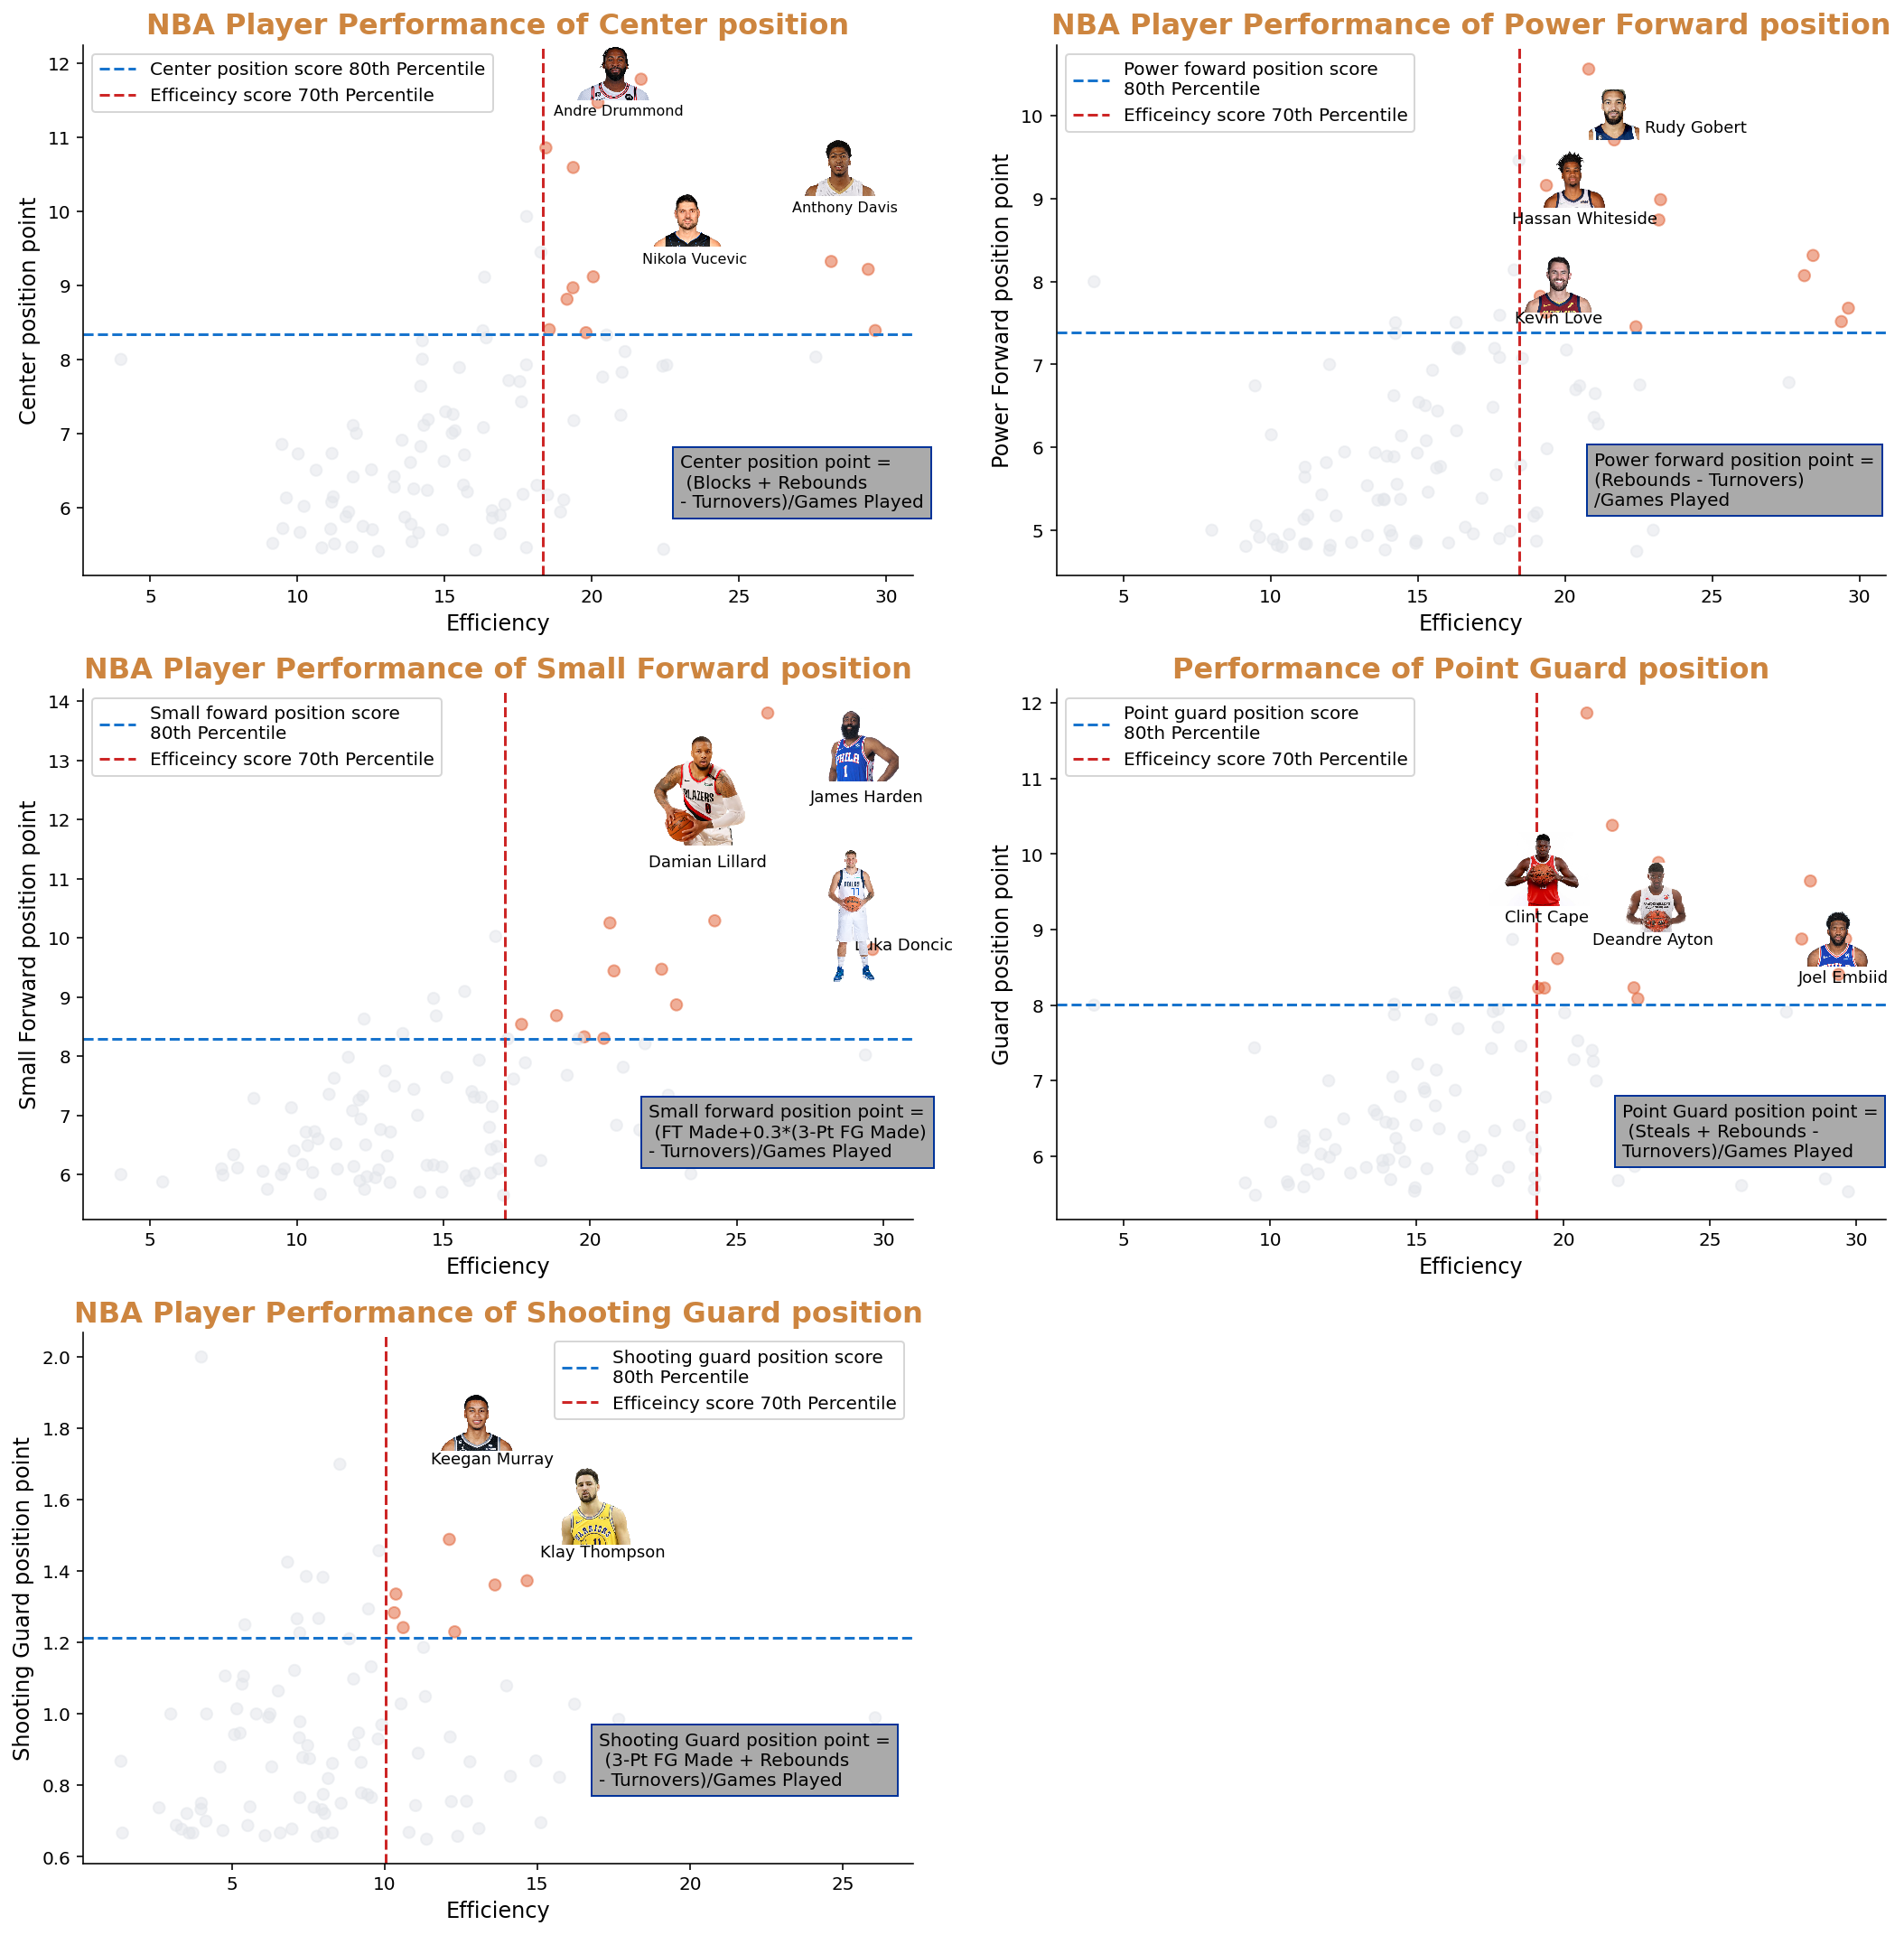

In [592]:
# colors = np.where(above_both_percentiles_mask, '#AA0000', '#CDC9C9')
def plot_logo_image(x, y, image, ax, zoom, z_offset,w):
    imagebox = OffsetImage(image, zoom)
    ab = AnnotationBbox(imagebox, (x+w, y - z_offset), xycoords='data', frameon=False)
    ax.add_artist(ab)

fig, ((ax1, ax2), (ax3, ax4),(ax5,_)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.delaxes(_) 

center_score_80th_percentile = np.percentile(df_center['center_score'], 80)
eff_70th_percentile = np.percentile(df_center['Efficency'], 70)
above_80th_percentile_mask_center = df_center['center_score'] >= center_score_80th_percentile
above_70th_percentile_mask_eff = df_center['Efficency'] >= eff_70th_percentile
above_both_percentiles_mask = above_80th_percentile_mask_center & above_70th_percentile_mask_eff
colors = np.where(above_both_percentiles_mask, '#E15F32', '#E2E5EA')
ax1.scatter(df_center['Efficency'], df_center['center_score'], c=colors, s=40, alpha=0.5)
plot_logo_image(df_center['Efficency'][5], df_center['center_score'][5], img, ax1, 0.03,0,0)
plot_logo_image(df_center['Efficency'][0], df_center['center_score'][0], img2, ax1, 0.08,0,0)
plot_logo_image(df_center['Efficency'][7], df_center['center_score'][7], img3, ax1, 0.12,0,0)
ax1.set_xlabel('Efficiency',fontsize=12)
ax1.set_ylabel('Center position point',fontsize=12)
ax1.set_title('NBA Player Performance of Center position', fontsize=16, fontweight='bold', color='#CD853F')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.axhline(y=center_score_80th_percentile, color='#1874CD', linestyle='--',label='Center position score 80th Percentile')
ax1.axvline(x=eff_70th_percentile, color='#CD2626', linestyle='--',label='Efficeincy score 70th Percentile')
ax1.legend(loc="upper left")
ax1.text(s="Anthony Davis",x=26.8, y=10, fontsize=8)
ax1.text(s="Andre Drummond",x=18.7, y=11.3, fontsize=8)
ax1.text(s="Nikola Vucevic",x=21.7, y=9.3, fontsize=8)
set1 = dict(facecolor='#AAAAAA', edgecolor='#003399')
ax1.text(s="Center position point =\n (Blocks + Rebounds \n- Turnovers)/Games Played",x=23, y=6, fontsize=10,bbox=set1)

power_score_80th_percentile = np.percentile(df_power['power_score'], 80)
eff_70th_percentile = np.percentile(df_power['Efficency'], 70)
above_80th_percentile_mask_power = df_power['power_score'] >= power_score_80th_percentile
above_70th_percentile_mask_eff = df_power['Efficency'] >= eff_70th_percentile
above_both_percentiles_mask = above_80th_percentile_mask_power & above_70th_percentile_mask_eff
colors2 = np.where(above_both_percentiles_mask, '#E15F32', '#E2E5EA')
ax2.scatter(df_power['Efficency'], df_power['power_score'], c=colors2, s=40, alpha=0.5)
plot_logo_image(df_power['Efficency'][3], df_power['power_score'][3], img4, ax2, 0.13,0,0)
plot_logo_image(df_power['Efficency'][1], df_power['power_score'][1], img5, ax2, 0.08, -0.3,0)
plot_logo_image(df_power['Efficency'][10], df_power['power_score'][10], img6, ax2, 0.08,0,0)
ax2.set_xlabel('Efficiency',fontsize=12)
ax2.set_ylabel('Power Forward position point',fontsize=12)
ax2.set_title('NBA Player Performance of Power Forward position', fontsize=16, fontweight='bold', color='#CD853F')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.axhline(y=power_score_80th_percentile, color='#1874CD', linestyle='--',label='Power foward position score \n80th Percentile')
ax2.axvline(x=eff_70th_percentile, color='#CD2626', linestyle='--',label='Efficeincy score 70th Percentile')
ax2.legend(loc="upper left")
ax2.text(s="Hassan Whiteside",x=18.2, y=8.7, fontsize=9)
ax2.text(s="Rudy Gobert",x=22.7, y=9.8, fontsize=9)
ax2.text(s="Kevin Love",x=18.3, y=7.5, fontsize=9)
ax2.text(s="Power forward position point =\n(Rebounds - Turnovers)\n/Games Played",x=21, y=5.3, fontsize=10,bbox=set1)

small_score_80th_percentile = np.percentile(df_small['small_score'], 80)
eff_70th_percentile = np.percentile(df_small['Efficency'], 70)
above_80th_percentile_mask_small = df_small['small_score'] >= small_score_80th_percentile
above_70th_percentile_mask_eff = df_small['Efficency'] >= eff_70th_percentile
above_both_percentiles_mask = above_80th_percentile_mask_small & above_70th_percentile_mask_eff
colors3 = np.where(above_both_percentiles_mask, '#E15F32', '#E2E5EA')
ax3.scatter(df_small['Efficency'], df_small['small_score'], c=colors3, s=40, alpha=0.5)
plot_logo_image(df_small['Efficency'][1], df_small['small_score'][1], img7, ax3, 0.045, 0,0)
plot_logo_image(df_small['Efficency'][3], df_small['small_score'][3], img8, ax3, 0.08, 0,0)
plot_logo_image(df_small['Efficency'][2], df_small['small_score'][2], img9, ax3, 0.08, 0,0)
ax3.set_xlabel('Efficiency',fontsize=12)
ax3.set_ylabel('Small Forward position point',fontsize=12)
ax3.set_title('NBA Player Performance of Small Forward position', fontsize=16, fontweight='bold', color='#CD853F')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.axhline(y=small_score_80th_percentile, color='#1874CD', linestyle='--',label='Small foward position score \n80th Percentile')
ax3.axvline(x=eff_70th_percentile, color='#CD2626', linestyle='--',label='Efficeincy score 70th Percentile')
ax3.legend(loc="upper left")
ax3.text(s="James Harden",x=27.5, y=12.3, fontsize=9)
ax3.text(s="Luka Doncic",x=29, y=9.8, fontsize=9)
ax3.text(s="Damian Lillard",x=22, y=11.2, fontsize=9)
ax3.text(s="Small forward position point =\n (FT Made+0.3*(3-Pt FG Made)\n- Turnovers)/Games Played",x=22, y=6.3, fontsize=10,bbox=set1)

point_score_80th_percentile = np.percentile(df_point['power_point'], 80)
eff_70th_percentile = np.percentile(df_point['Efficency'], 70)
above_80th_percentile_mask_point = df_point['power_point'] >= point_score_80th_percentile
above_70th_percentile_mask_eff = df_point['Efficency'] >= eff_70th_percentile
above_both_percentiles_mask = above_80th_percentile_mask_point & above_70th_percentile_mask_eff
colors4 = np.where(above_both_percentiles_mask, '#E15F32', '#E2E5EA')
ax4.scatter(df_point['Efficency'], df_point['power_point'], c=colors4, s=40, alpha=0.5)
ax4.set_xlabel('Efficiency',fontsize=12)
ax4.set_ylabel('Guard position point',fontsize=12)
ax4.set_title('Performance of Point Guard position', fontsize=16, fontweight='bold', color='#CD853F')
plot_logo_image(df_point['Efficency'][4], df_point['power_point'][4], img10, ax4,0.03,0,0)
plot_logo_image(df_point['Efficency'][12], df_point['power_point'][12], img11, ax4,0.13,-0.5,0)
plot_logo_image(df_point['Efficency'][7], df_point['power_point'][7], img12, ax4,0.015,0,0)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.axhline(y=point_score_80th_percentile, color='#1874CD', linestyle='--',label='Point guard position score \n80th Percentile')
ax4.axvline(x=eff_70th_percentile, color='#CD2626', linestyle='--',label='Efficeincy score 70th Percentile')
ax4.legend(loc="upper left")
ax4.text(s="Clint Capela",x=18, y=9.1, fontsize=9)
ax4.text(s="Joel Embiid",x=28, y=8.3, fontsize=9)
ax4.text(s="Deandre Ayton",x=21, y=8.8, fontsize=9)
ax4.text(s="Point Guard position point =\n (Steals + Rebounds - \nTurnovers)/Games Played",x=22, y=6, fontsize=10,bbox=set1)


shot_score_80th_percentile = np.percentile(df_shot['shot_score'], 80)
eff_70th_percentile = np.percentile(df_shot['Efficency'], 70)
above_80th_percentile_mask_shot = df_shot['shot_score'] >= shot_score_80th_percentile
above_70th_percentile_mask_eff = df_shot['Efficency'] >= eff_70th_percentile
above_both_percentiles_mask = above_80th_percentile_mask_shot & above_70th_percentile_mask_eff
colors5 = np.where(above_both_percentiles_mask, '#E15F32', '#E2E5EA')
ax5.scatter(df_shot['Efficency'], df_shot['shot_score'], c=colors5, s=40, alpha=0.5)
ax5.set_xlabel('Efficiency',fontsize=12)
ax5.set_ylabel('Shooting Guard position point',fontsize=12)
ax5.set_title('NBA Player Performance of Shooting Guard position', fontsize=16, fontweight='bold', color='#CD853F')
plot_logo_image(df_shot['Efficency'][1], df_shot['shot_score'][1], img13, ax5,0.08,0,0)
plot_logo_image(df_shot['Efficency'][3], df_shot['shot_score'][3], img14, ax5,0.08,0,0)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.axhline(y=shot_score_80th_percentile ,color='#1874CD', linestyle='--',label='Shooting guard position score \n80th Percentile')
ax5.axvline(x=eff_70th_percentile, color='#CD2626', linestyle='--',label='Efficeincy score 70th Percentile')
ax5.legend(loc="upper right")
ax5.text(s="Keegan Murray",x=11.5, y=1.7, fontsize=9)
ax5.text(s="Klay Thompson",x=15.1, y=1.44, fontsize=9)
ax5.text(s="Shooting Guard position point =\n (3-Pt FG Made + Rebounds\n- Turnovers)/Games Played",x=17, y=0.8, fontsize=10,bbox=set1)

plt.tight_layout()
plt.show()